# Installing and importing libraries

In [143]:
#setup 
import pandas as pd
pd.set_option('display.max_colwidth', 100)
import random
import string
import numpy as np
import re


#important libraries for preprocessing using NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from collections import Counter
nltk.download
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer



# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from math import log, sqrt
from collections import Counter
import seaborn as sns






[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\johnp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the Data

In [144]:
tweets = pd.read_csv(r'C:\\Depression\\depression_tweets.csv',engine='python')
tweets.head(20)

Unnamed: 0  \
0          106   
1          217   
2          220   
3          288   
4          540   
5          624   
6          701   
7          808   
8         1193   
9         1324   
10        1332   
11        1368   
12        1578   
13        1595   
14        1861   
15        1889   
16        1899   
17        1919   
18        1992   
19        2097   

                                                                                                message  \
0                                             just had a real good moment. i missssssssss him so much,    
1                                                            is reading manga  http://plurk.com/p/mzp1e   
2                  @comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8    
3   @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. ...   
4                                                         ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
5                                                                 so sleepy. good times tonight though    
6   @SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be...   
7                                                                 23 or 24Ã¯Â¿Â½C possible today. Nice    
8                                                           nite twitterville  workout in the am  -ciao   
9                                                       @daNanner Night, darlin'!  Sweet dreams to you    
10                                                                             Good morning everybody!    
11  Finally! I just created my WordPress Blog. There's already a blog up on the Seattle Coffee Commu...   
12                      kisha they cnt get over u til they get out frm under u just remember ur on top    
13                       @nicolerichie Yes i remember that band, It was Awesome, Will you please reply    
14                                                               I really love reflections and shadows    
15                               @blueaero ooo it's fantasy?  i like fantasy novels   will check it out   
16  @rokchic28 no probs, I sell nothing other than my blog http://snedwan.com  I'll have to get a li...   
17                                 @shipovalov &quot;NOKLA connecting people&quot; ?? ???????  ???????    
18           Once again stayed up to late and have to start too early  It is a good thing I like my job   
19                        @Kal_Penn I just read about your new job, CONGRATULATIONS!  That's fantastic.   

    label  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0  
10      0  
11      0  
12      0  
13      0  
14      0  
15      0  
16      0  
17      0  
18      0  
19      0

In [145]:
#Drop index column
tweets.drop(tweets.columns[0], axis = 1) 
tweets.head()

Unnamed: 0  \
0         106   
1         217   
2         220   
3         288   
4         540   

                                                                                               message  \
0                                            just had a real good moment. i missssssssss him so much,    
1                                                           is reading manga  http://plurk.com/p/mzp1e   
2                 @comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8    
3  @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. ...   
4                                                        ADD ME ON MYSPACE!!!  myspace.com/LookThunder   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [146]:
#check 10 depression tweets
depression=tweets[tweets['label']==1]
depression.head(10)
                  

Unnamed: 0  \
8000      800000   
8001      800001   
8002      800002   
8003      800003   
8004      800004   
8005      800005   
8006      800006   
8007      800007   
8008      800008   
8009      800009   

                                                                                                  message  \
8000  The lack of this understanding is a small but significant part of what causes anxiety & depressi...   
8001  i just told my parents about my depression and it's so hard to get gen x people to understand th...   
8002  depression is something i don't speak about even going through it because it's also such a doubl...   
8003               Made myself a tortilla filled with pb&j. My depression is cured. Olivia:1 depression:0   
8004  @WorldofOutlaws I am gonna need depression meds soon, these rainouts are spinning my equilibrium...   
8005  my anxiety and my depression fighting over whos day it is  https://twitter.com/crissles/status/9...   
8006  wow she's suddenly cured my depression and gave us world peace  https://twitter.com/bearfaceingt...   
8007  I am officially done with @kanyewest. him, the neptunes, justin timberlake, timbaland. got me ou...   
8008  Me: what's wrong?My girl: *looks up at me with look of depression and stress on her face**Me: sa...   
8009  @AusBorderForce @PeterDutton_MP @shanebazzi Agreed <Emoji: Clapping hands sign><Emoji: Clapping ...   

      label  
8000      1  
8001      1  
8002      1  
8003      1  
8004      1  
8005      1  
8006      1  
8007      1  
8008      1  
8009      1

Top 20 most unique words used from the dataset 

       Word  Frequency
 depression       1260
         to       1242
        and       1234
        the        999
          a        947
          I        926
         of        905
         is        656
         my        574
         in        508
        you        504
       with        457
        for        419
       that        396
         it        333
         me        314
       have        306
 Depression        290
          i        264
        not        253




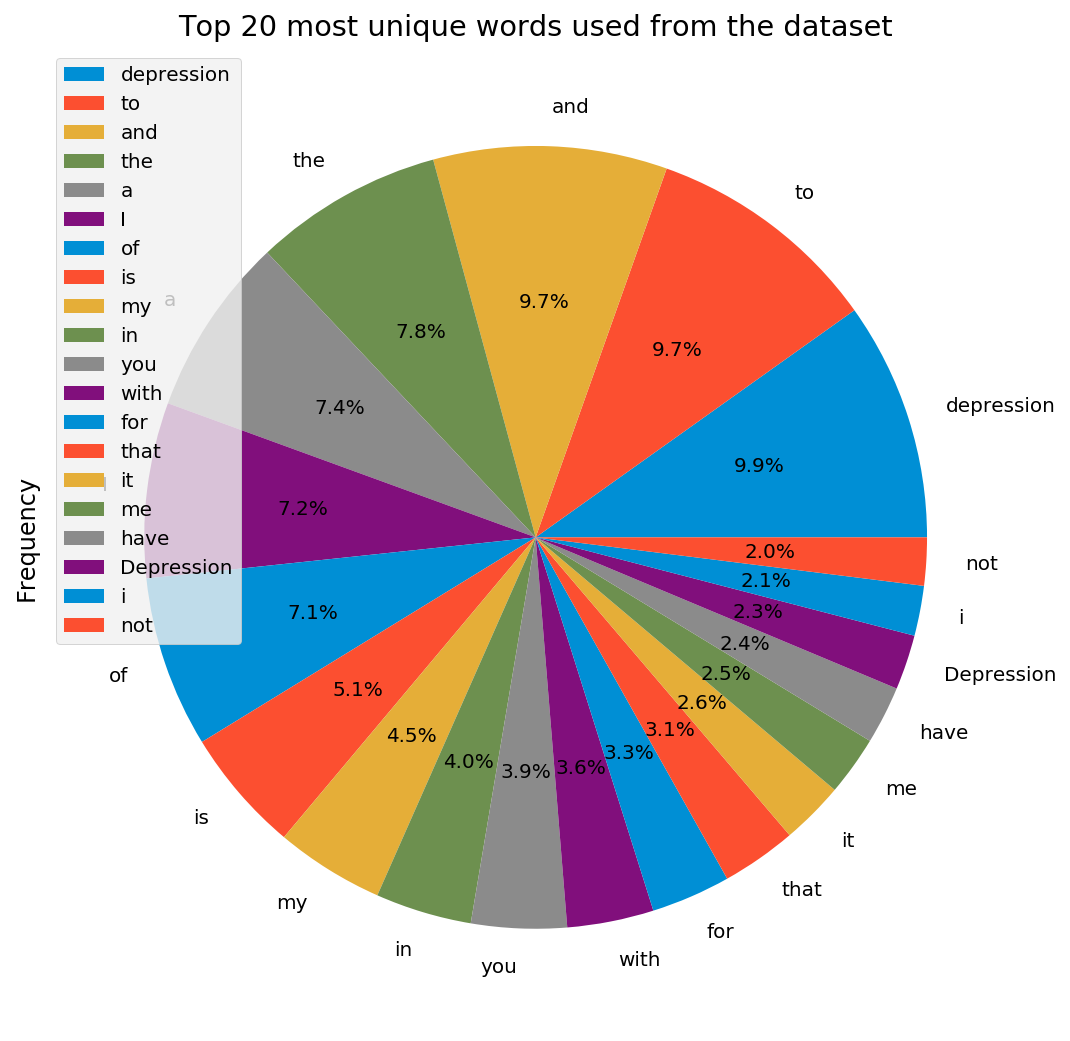

In [147]:
#Find top 20 frequently used words in depression message
no_top_unique_words = "20" 

result = Counter(" ".join(depression['message'].values.tolist()).split(" ")).items()
df2 = pd.DataFrame(result)
df2.columns =['Word', 'Frequency']
df2 = df2[df2.Word != ""] #Deletes the empty spaces counted
df2 = df2.sort_values(['Frequency'], ascending=[False]) #Sort dataframe by frequency (Descending)

print('\033[1mTop '+no_top_unique_words+' most unique words used from the dataset\033[0m \n')
print(df2.head(int(no_top_unique_words)).to_string(index=False)) #Prints the top N unique words used
print("\n")
df3 = df2.head(int(no_top_unique_words))
df3.plot(y='Frequency', kind='pie', labels=df3['Word'], figsize=(9, 9), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used from the dataset')

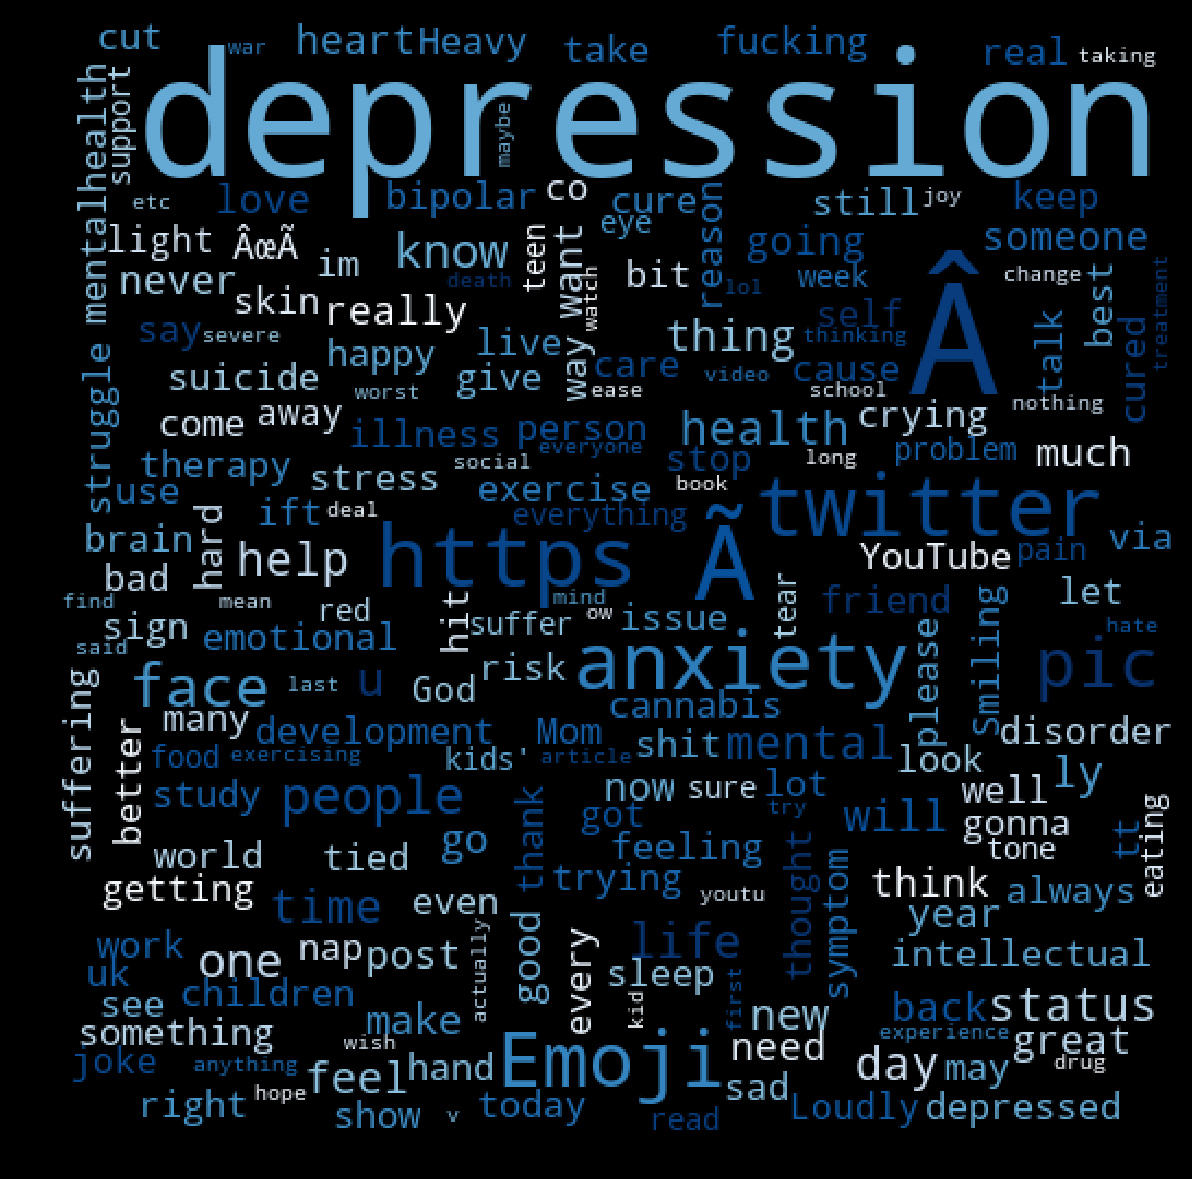

In [148]:
depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

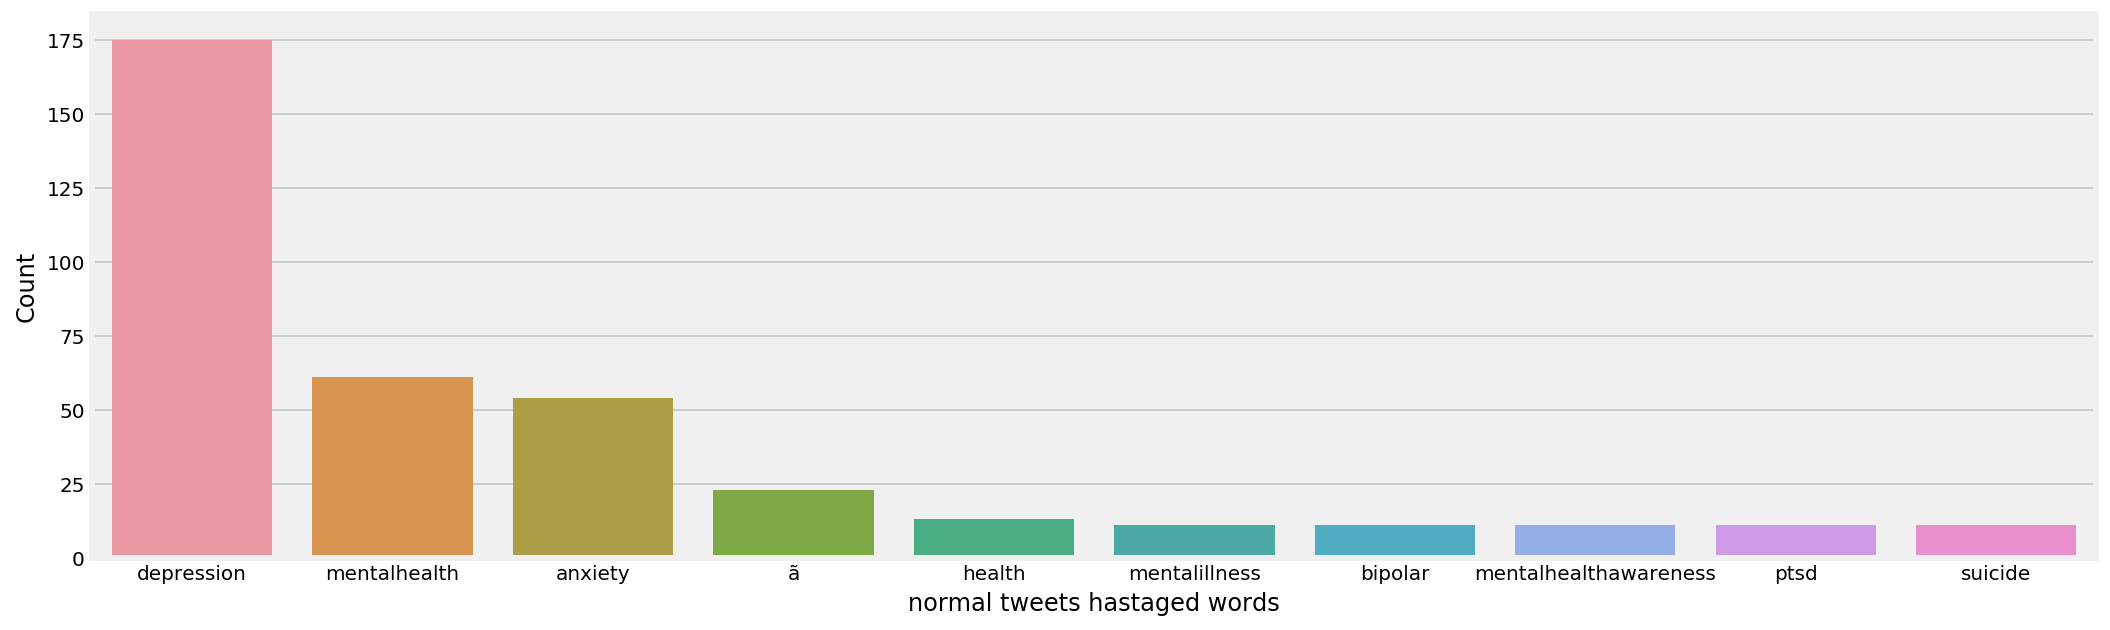

In [149]:
# collecting the # linked words in depression tweets

def ht_extract(x):
    hts = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hts.append(ht)

    return hts

ht_regular = ht_extract(depression['message'].str.lower())

# unnesting list
ht_regular = sum(ht_regular,[])

a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({'hts': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count",n=10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "hts", y = "Count")
ax.set(ylabel = 'Count',xlabel='normal tweets hastaged words')
plt.show()


In [150]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#define a function for testing.
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [151]:
#Briefly overview a few tweets to get better idea
features = depression.iloc[:, 1].values 
print(features)

["The lack of this understanding is a small but significant part of what causes anxiety & depression to both feel so incredibly lonely. It's soooo easy to compare. It's so easy to invalidate ourselves because of that."
 "i just told my parents about my depression and it's so hard to get gen x people to understand that this is not something that i can control all the time or just cure with a walk or by keeping my mind busy"
 "depression is something i don't speak about even going through it because it's also such a double edged sword. i love every race. even if white people had done so much i can't hate them all. my grandma is legit white! how tf can i hate, i do dislike people though."
 ...
 'Ketamine Nasal Spray Shows Promise Against Depression, Suicide #health https://cmun.it/4sjligkÃ‚Â\xa0'
 "dont mistake a bad day with depression! everyone has 'em!" '0']


In [183]:
#remove rows with no tweet text to analyze
features = [x for x in features if x is not None]

features = [re.sub(r'[\n]', ' ', x) for x in features] #remove \m line breaks
features = [re.sub(r'&amp;', ' ', x) for x in features] #remove ampersand trash code
features = [re.sub(r':', ' ', x) for x in features] #remove colons that appear after retweet mentions
features = [re.sub(r'https', ' ', x) for x in features] #remove https as a word, resulting from above
features = [re.sub(r"[\"\'’….,]", '', x) for x in features] #remove many special characters, including special apostrophe
features = [re.sub(r"^RT ", '', x) for x in features] #remove RT (retweet symbol)

#keep a copy of the original set for reference and troubleshooting
scores = features

#make a dataframe for use later.
features2 = pd.DataFrame(features)
features2.columns = ['message']

#the most problematic tweet text-wise; this originally contained \n throughout.
samp = features2.loc[[1711]].to_string()
print(sentiment_analyzer_scores(samp))

                                              message
1711  {neg  0115 neu  0701 pos  0184 compound  05267} {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


In [184]:
#Tweets classification, positive, negative, and neutrual
i=0
for feature in scores:
    vs = analyzer.polarity_scores(feature)
    scores[i] = ("{}".format(str(vs)))
    i+=1

In [185]:
scores2 = pd.DataFrame(scores)
scores2.columns = ['scores']
scores2['scores'] = scores2['scores'].astype(str)

f = lambda x: x["scores"].split("'neg': ")[1].split(",")[0]
scores2['neg']  = scores2.apply(f, axis=1)

f = lambda x: x["scores"].split("'neu': ")[1].split(",")[0]
scores2['neu']  = scores2.apply(f, axis=1)

f = lambda x: x["scores"].split("'pos': ")[1].split(",")[0]
scores2['pos']  = scores2.apply(f, axis=1)

f = lambda x: x["scores"].split("'compound': ")[1].split("}")[0]
scores2['compound']  = scores2.apply(f, axis=1)

scores2 = scores2.drop("scores", axis = 1)

scores2.head(5)

neg  neu  pos compound
0  0.0  1.0  0.0      0.0
1  0.0  1.0  0.0      0.0
2  0.0  1.0  0.0      0.0
3  0.0  1.0  0.0      0.0
4  0.0  1.0  0.0      0.0

In [186]:
features_scores = features2.join(scores2) #merge

#convert to numeric for sorting
features_scores[['pos','neg','neu','compound']] = features_scores[['pos','neg','neu','compound']].apply(pd.to_numeric)

#sort the dataframe
features_scores = features_scores.sort_values('compound',ascending=False)

#expand the display of the column
pd.options.display.max_colwidth = 120
features_scores.head(10)

message  neg  neu  pos  \
0     {neg  0238 neu  0555 pos  0207 compound  -01767}  0.0  1.0  0.0   
1590  {neg  0244 neu  0697 pos  0059 compound  -07814}  0.0  1.0  0.0   
1538     {neg  0282 neu  0718 pos  00 compound  -0899}  0.0  1.0  0.0   
1539    {neg  0403 neu  0597 pos  00 compound  -06597}  0.0  1.0  0.0   
1540   {neg  0175 neu  0569 pos  0256 compound  01779}  0.0  1.0  0.0   
1541  {neg  0195 neu  0744 pos  0061 compound  -07205}  0.0  1.0  0.0   
1542    {neg  0241 neu  0759 pos  00 compound  -06908}  0.0  1.0  0.0   
1543    {neg  012 neu  0713 pos  0167 compound  02263}  0.0  1.0  0.0   
1544    {neg  0197 neu  0512 pos  0291 compound  0128}  0.0  1.0  0.0   
1545    {neg  0179 neu  0821 pos  00 compound  -05719}  0.0  1.0  0.0   

      compound  
0          0.0  
1590       0.0  
1538       0.0  
1539       0.0  
1540       0.0  
1541       0.0  
1542       0.0  
1543       0.0  
1544       0.0  
1545       0.0

In [187]:
features_scores.tail(10)

message  neg  neu  pos  \
767     {neg  0209 neu  0791 pos  00 compound  -05719}  0.0  1.0  0.0   
769    {neg  0253 neu  0411 pos  0336 compound  00516}  0.0  1.0  0.0   
776   {neg  0381 neu  0453 pos  0166 compound  -05859}  0.0  1.0  0.0   
770    {neg  0253 neu  0411 pos  0336 compound  00516}  0.0  1.0  0.0   
771    {neg  0253 neu  0411 pos  0336 compound  00516}  0.0  1.0  0.0   
772    {neg  0253 neu  0411 pos  0336 compound  00516}  0.0  1.0  0.0   
773    {neg  0253 neu  0411 pos  0336 compound  00516}  0.0  1.0  0.0   
774   {neg  0319 neu  0517 pos  0164 compound  -04215}  0.0  1.0  0.0   
775    {neg  0223 neu  0482 pos  0295 compound  00516}  0.0  1.0  0.0   
2313            {neg  00 neu  10 pos  00 compound  00}  0.0  1.0  0.0   

      compound  
767        0.0  
769        0.0  
776        0.0  
770        0.0  
771        0.0  
772        0.0  
773        0.0  
774        0.0  
775        0.0  
2313       0.0

In [188]:
features_scores['compound'].mean()

0.0

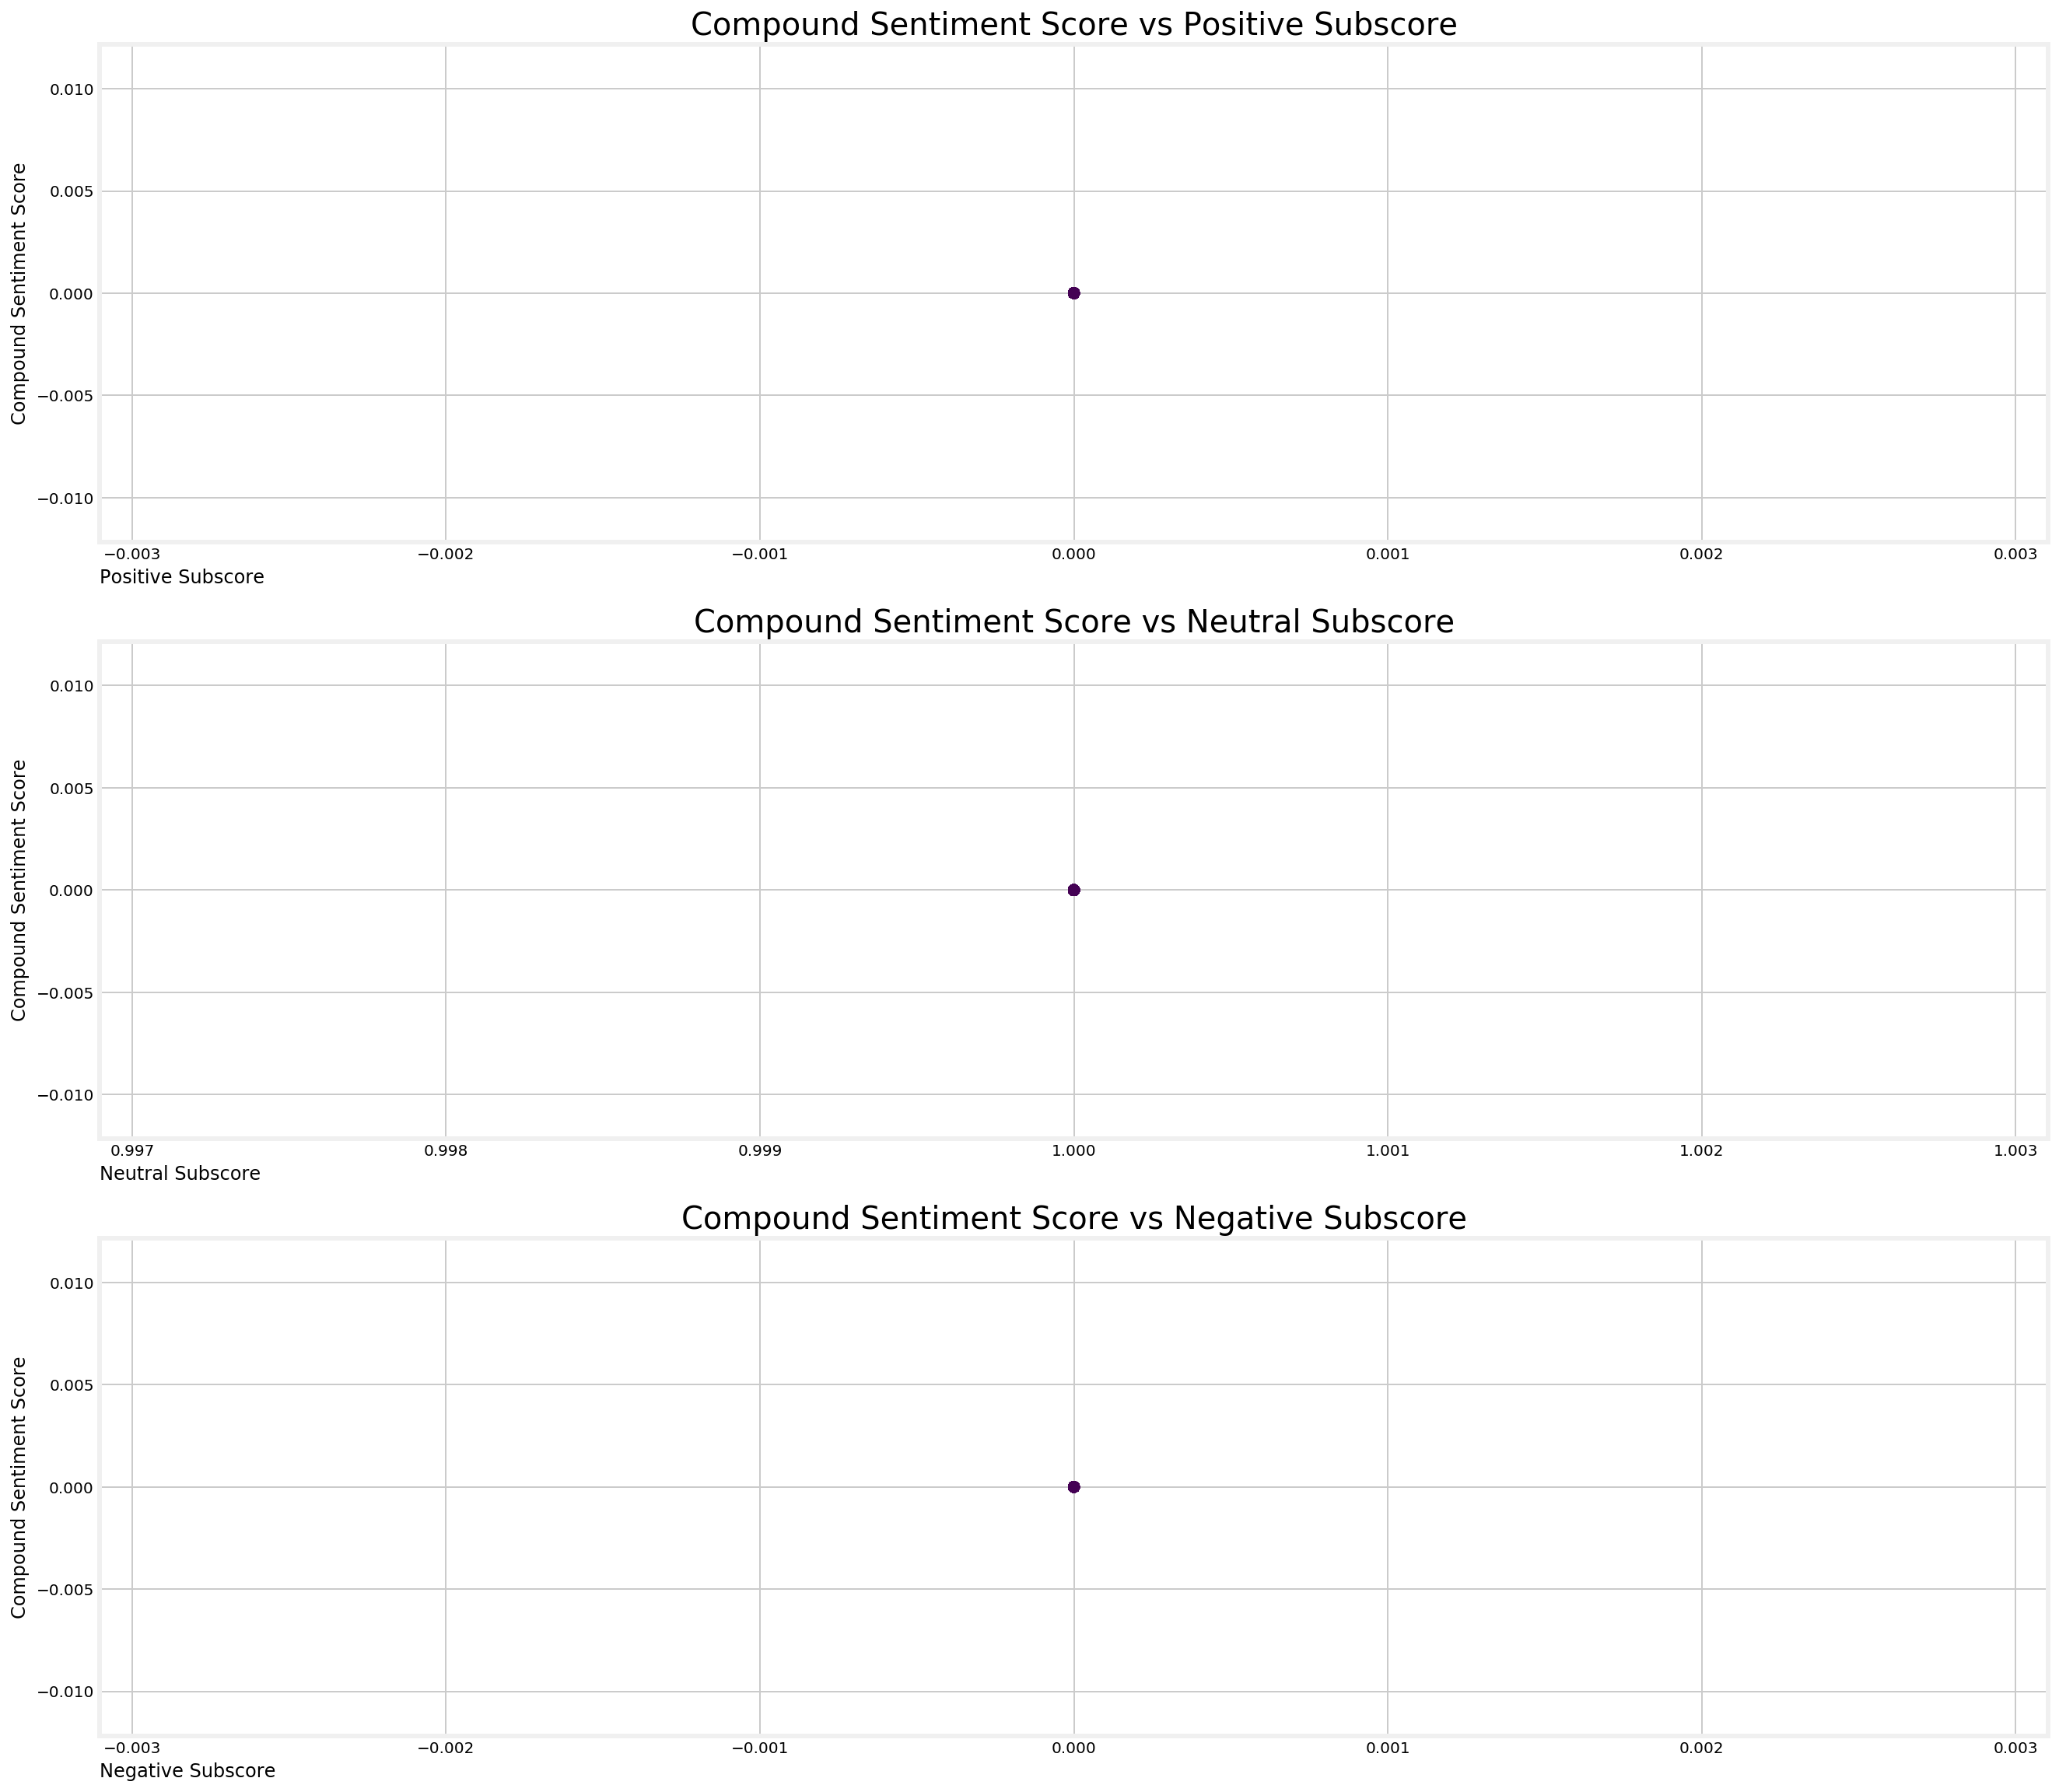

In [189]:
from matplotlib.transforms import Bbox, TransformedBbox, \
    blended_transform_factory

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize=(20,20)) #set sixe of figure

# Compound Score versus positive score
x1 = features_scores['pos']
y1 = features_scores['compound']
colors1 = features_scores['compound']
area1 = (50)  

#define subplot
plt.subplot(3, 1, 1)
plt.scatter(x1, y1, s=area1, c=colors1, alpha=0.5)

# Add title and axis names
plt.title('Compound Sentiment Score vs Positive Subscore',fontsize=20)
plt.xlabel('Positive Subscore',fontsize=12,horizontalalignment='left',x=0.0)
plt.ylabel('Compound Sentiment Score',fontsize=12)

#Compound Score versus neutral score
x2 = features_scores['neu']
y2 = features_scores['compound']
colors2 = features_scores['compound']
area2 = (50) 

plt.subplot(3, 1, 2)
plt.scatter(x2, y2, s=area2, c=colors2, alpha=0.5)

# Add title and axis names and adjust fontsize
plt.title('Compound Sentiment Score vs Neutral Subscore',fontsize=20)
plt.xlabel('Neutral Subscore',fontsize=12,horizontalalignment='left',x=0.0)
plt.ylabel('Compound Sentiment Score',fontsize=12)

#Compound Score versus negative score
x3 = features_scores['neg']
y3 = features_scores['compound']
colors3 = features_scores['compound']
area3 = (50)  # 0 to 15 point radii

plt.subplot(3, 1, 3)
plt.scatter(x3, y3, s=area3, c=colors3, alpha=0.5)

# Add title and axis names
plt.title('Compound Sentiment Score vs Negative Subscore',fontsize=20)
plt.xlabel('Negative Subscore',fontsize=12,horizontalalignment='left',x=0.0)
plt.ylabel('Compound Sentiment Score',fontsize=12)

plt.show()

In [190]:
# calculate frequency by word
word_freq = pd.DataFrame(features_scores.tweet_text.str.split(expand=True).stack().value_counts())

#reset index, rename columns, format
word_freq.reset_index(level=0, inplace=True)
word_freq.columns = ['word','frequency']
word_freq['frequency'] = word_freq['frequency'].apply(pd.to_numeric)

#filter out words of less than two characters in length.
word_freq2 = word_freq[word_freq['word'].apply(lambda x: len(x) > 2)]

#filter words that appear less frequently than 100 times in the tweets
word_freq3 = word_freq2[word_freq2.frequency > 100]

#view result
word_freq3.head(10)

AttributeError: 'DataFrame' object has no attribute 'tweet_text'

In [191]:
pd.options.mode.chained_assignment = None  # default='warn'

#load stopwords
from nltk.corpus import stopwords 
stop = stopwords.words('english')

#convert to lowercase
word_freq3['word'] = word_freq3['word'].str.lower()

#remove stopwords
word_freq4 = word_freq3[~word_freq3['word'].isin(stop)]

#view result
word_freq4.head(10)

word  frequency
0   depression       1636
15      ã¢â€â¦        373
17  depression        362
21     anxiety        261
27        http        231
34      <emoji        192
37        like        179
42      people        146
44        dont        145
52        know        122

In [192]:
remove = ['ã¢â€â¦','http','<emoji','one']

word_freq5 = word_freq4[~word_freq4['word'].isin(remove)]

word_freq5.head(5)

word  frequency
0   depression       1636
17  depression        362
21     anxiety        261
37        like        179
42      people        146

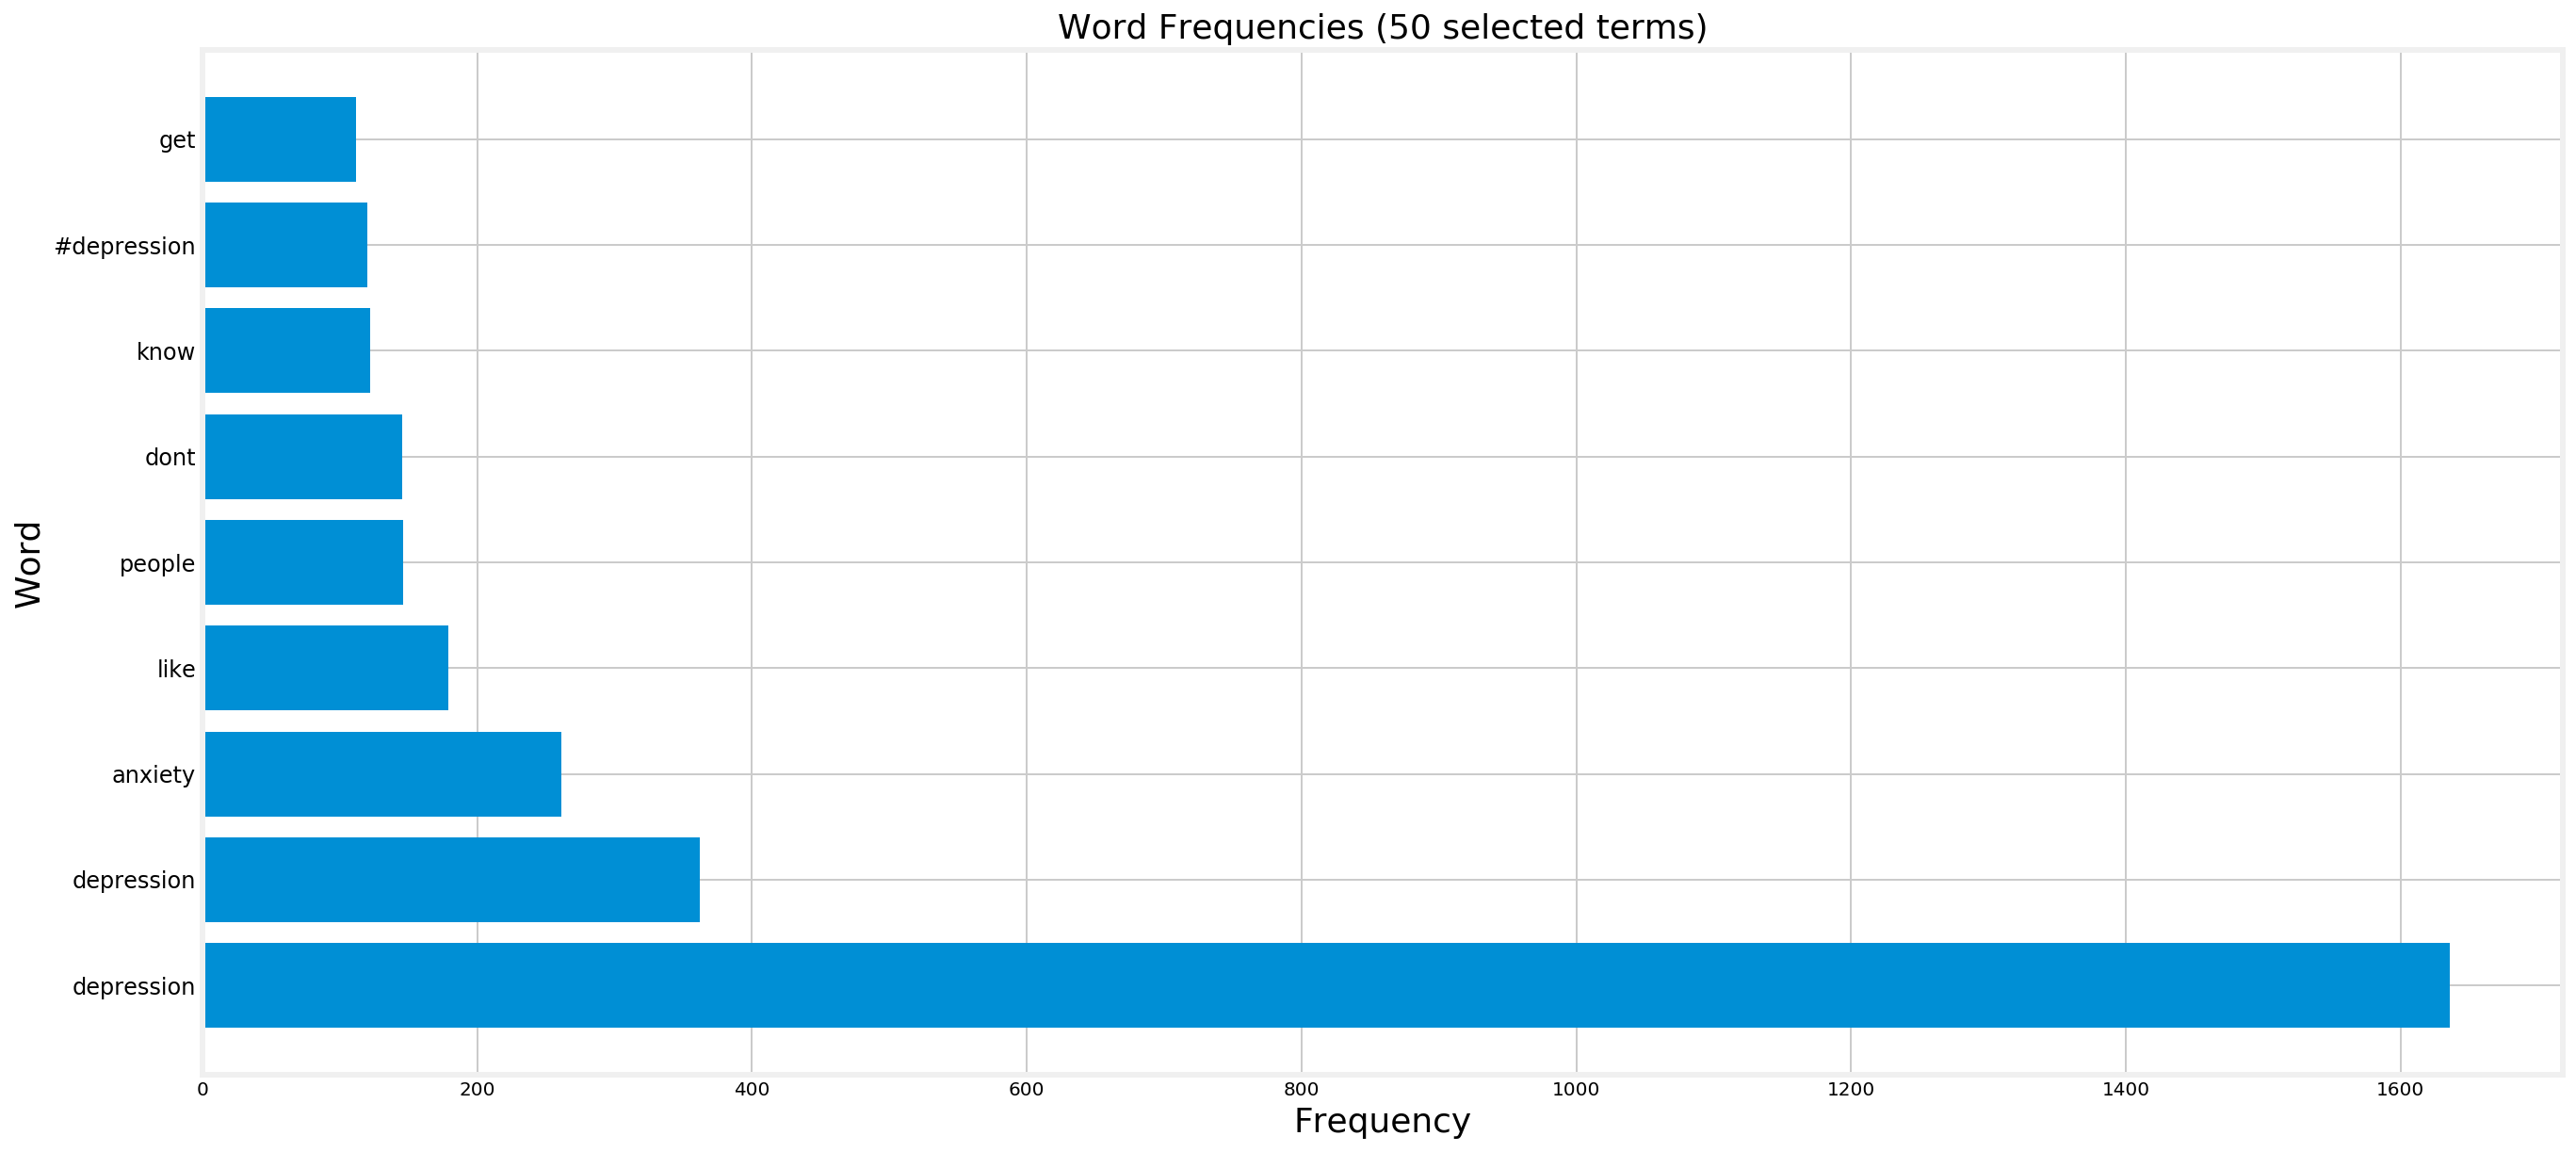

In [193]:
plt.figure(figsize=(20,10))
# this is for plotting purpose
index = np.arange(len(word_freq5['word'][:50]))
plt.barh(index, word_freq5['frequency'][:50])
plt.ylabel('Word', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.yticks(index, word_freq5['word'][:50], fontsize=12, rotation=0)
plt.title('Word Frequencies (50 selected terms)',fontsize=18)
plt.show()

In [171]:
terms = list(word_freq5['word'][:50])
terms_conc = ' | '.join(terms)
print(terms_conc)

depression | depression | anxiety | like | people | dont | know | #depression | get


In [172]:
features_scores_terms = features_scores[features_scores['tweet_text'].str.contains(terms_conc)==True]

features_scores_terms.head(10)

tweet_text  \
1855  @xJPUx<Emoji  Sunflower>   intimidating but madaldal <Emoji  Cat face with tears of joy><Emoji  Yellow heart>   7? m...   
116   @optimuffins good luck depression is real but not being stuck inside your head and rather paying attention to the ou...   
1484  @OliviaMaynard13 Youre most welcome I dont know if youve tried this but I found magnesium supplements helpful for my...   
436   @MyNameIsGaron Thanks for sharing Garon! Fellow anxiety/depression and effexor pal over here You are awesome and its...   
2118  Were all aware of the great effects of #exercise on our physical health but a fantastic study by @AmJPsychiatry has ...   
868   @honoretIy no not really I mean ya know depression a bitch but nah life good got a job a man friends family a dog an...   
273   This has been the calmest month of my life in years No panic/anxiety attacks in weeks No depression black holes maki...   
1565  hey everyone <Emoji  Sparkling heart> i just wanted to recommend for anyone struggling with anxiety & depression and...   
124   @MasaeAnela happy birthday! I know I barely talk anymore but I want you to know youre my biggest art inspiration eve...   
513   @AdrianVZiegler Hi Adrian your music is so goodyour music inspired my all time its something its something glorious ...   

        neg    neu    pos  compound  
1855  0.046  0.573  0.381    0.9887  
116   0.041  0.564  0.394    0.9638  
1484  0.099  0.556  0.345    0.9622  
436   0.000  0.573  0.427    0.9606  
2118  0.087  0.585  0.329    0.9332  
868   0.164  0.475  0.361    0.9267  
273   0.069  0.597  0.334    0.9253  
1565  0.171  0.493  0.336    0.9250  
124   0.075  0.637  0.288    0.9250  
513   0.067  0.630  0.304    0.9211

In [173]:
features_scores_terms.tail(10)

tweet_text  \
210   Chris never holds that incident against anyone but himself even though he was sexually assaulted and assaulted Why? ...   
1370  Molestation Attempted suicide twice  YALL DEPRESSION <Emoji  Loudly crying face> Do not live your life according to ...   
29    Feel so empty Worthless Failure Hopeless Unwanted A joke Fuck up Embarrassment #depression #borderlinepersonality #m...   
1309  #LatestNews from  http //MobileWebCitycomÃ‚Â    Negative thoughts and destructive emotions can bring pain unhappines...   
2208  wrap me tight in rice-paper string http //archiveofourownorg/works/11717343Ã‚Â Ã¢Â€Â¢ NAMJIN namjoon-centric (76k)Ã¢...   
1272  fren  i have depressionme  have u been diagnosed?fren  i know i have depressionme  yea but have u been diagnosed??fr...   
146   insulting people who actually struggle with depression and suicidal thoughts everyday idc who started the rumor but ...   
1522  my name is katy im diagnosed with chronic depression and panic disorder my anxiety gets so bad that i get panic atta...   
1673  Depression works very much like this*minor inconvenience/stressful situation happens*My brain  *banging pots togethe...   
698   suicide is not a joke depression is not a joke mental illness is not a joke QUIT FAKING SUICIDES FOR CLOUT NOTICES A...   

        neg    neu    pos  compound  
210   0.355  0.579  0.066   -0.9682  
1370  0.384  0.554  0.062   -0.9683  
29    0.735  0.202  0.063   -0.9696  
1309  0.534  0.466  0.000   -0.9712  
2208  0.393  0.607  0.000   -0.9817  
1272  0.396  0.604  0.000   -0.9822  
146   0.449  0.551  0.000   -0.9855  
1522  0.573  0.367  0.060   -0.9856  
1673  0.698  0.241  0.061   -0.9861  
698   0.514  0.427  0.058   -0.9875

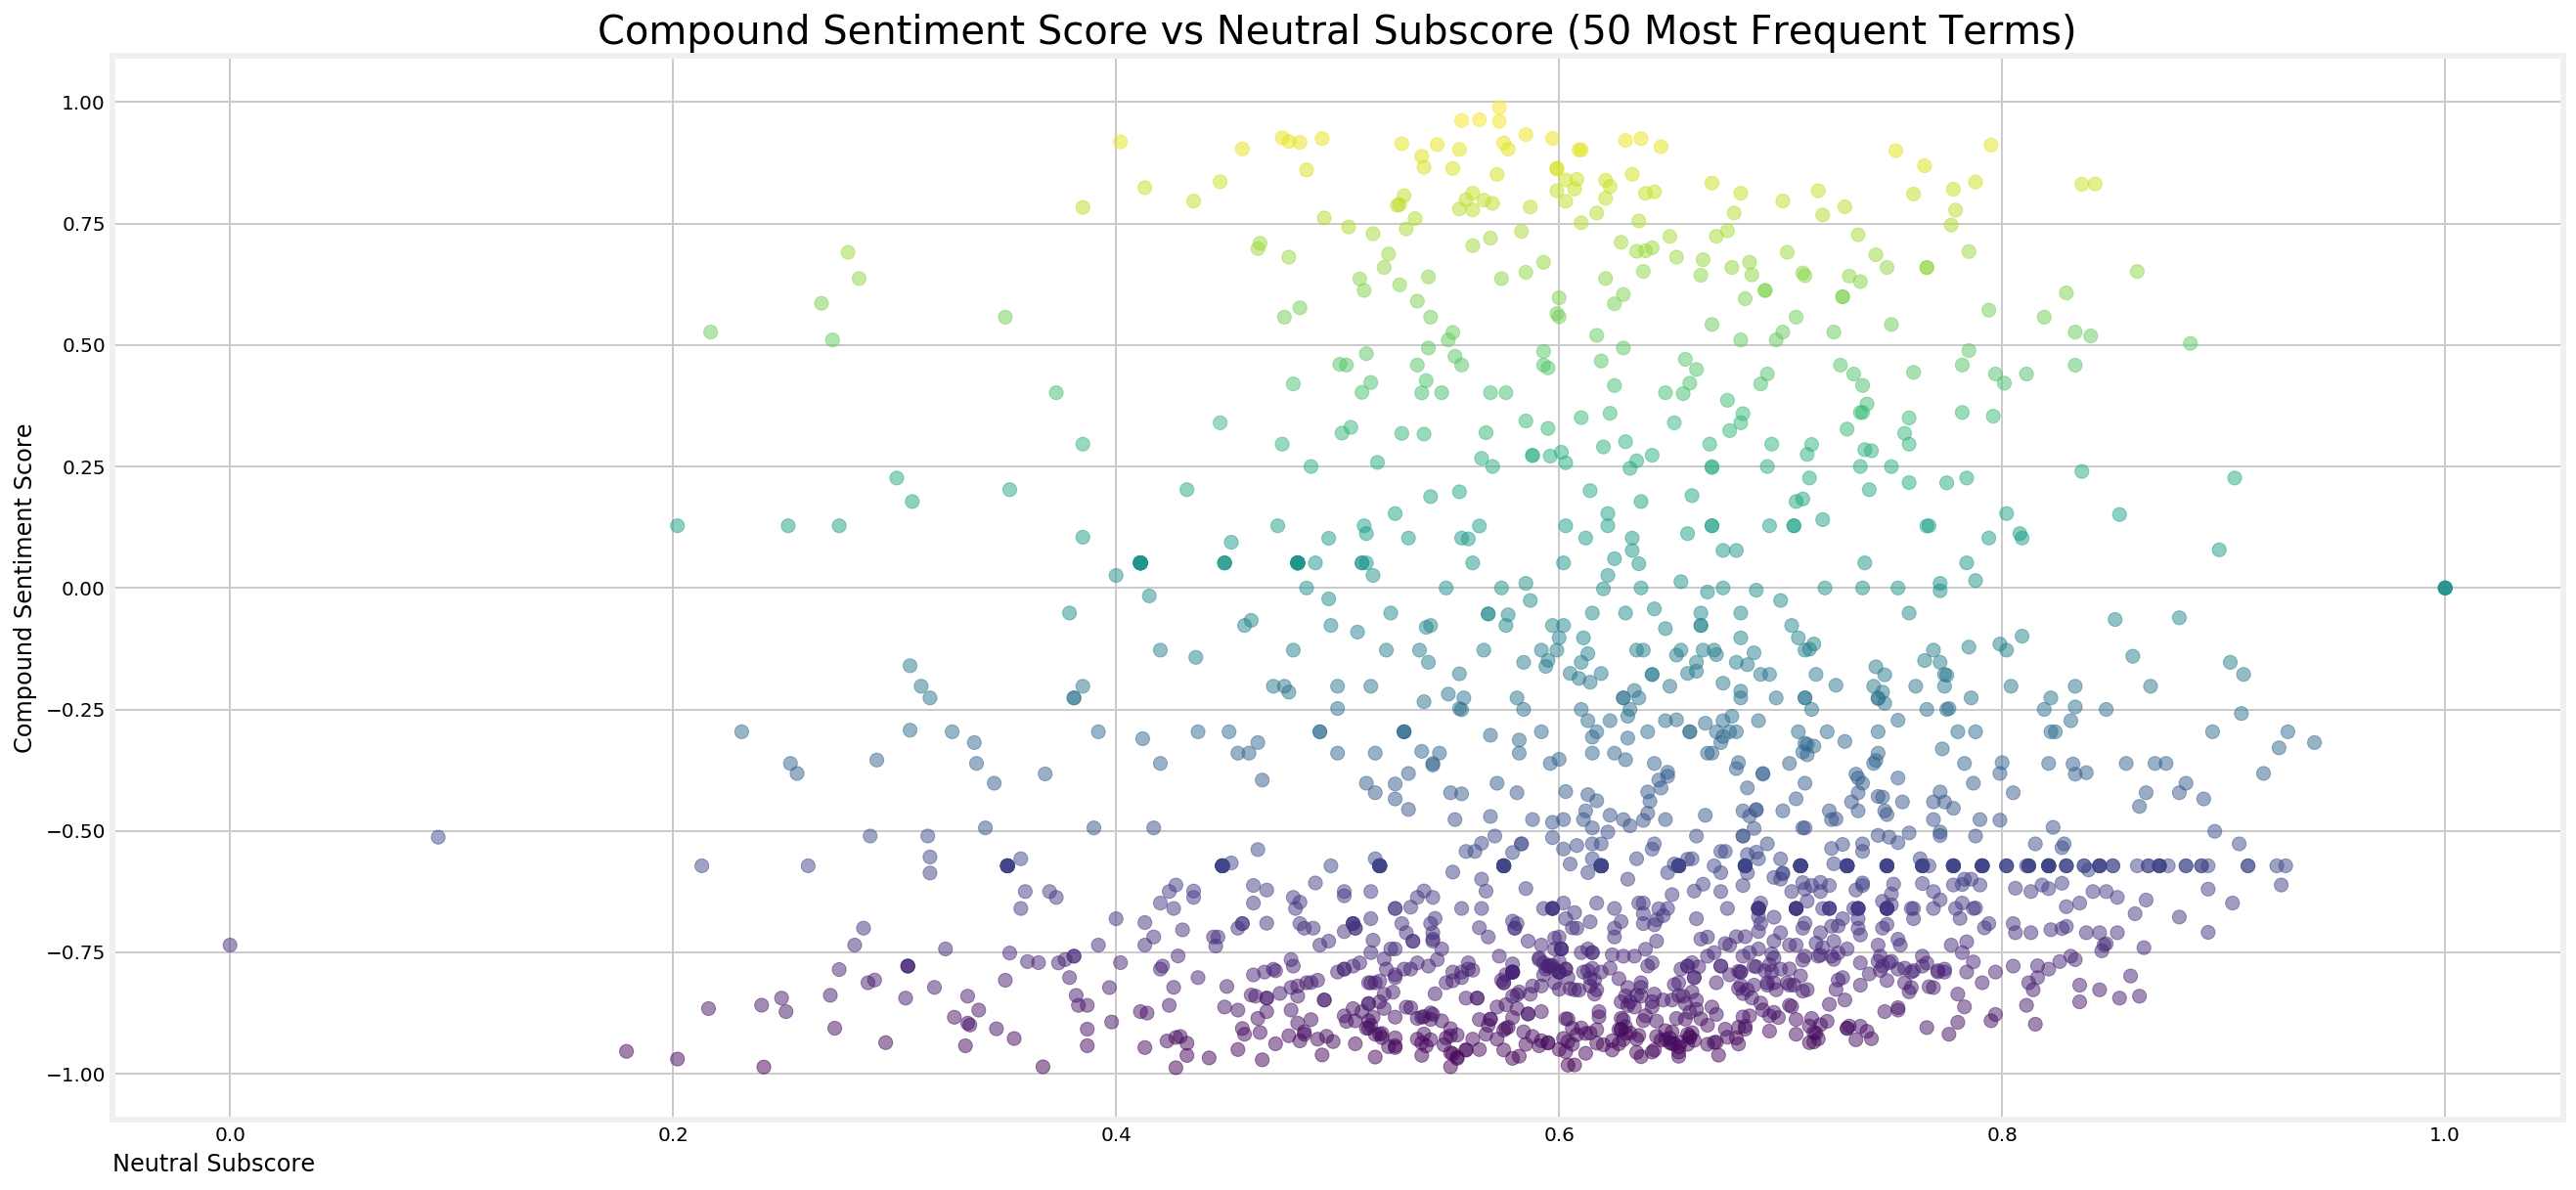

In [174]:
plt.figure(figsize=(20,10))

x = features_scores_terms['neu']
y = features_scores_terms['compound']
colors = features_scores_terms['compound']
area = (50) 

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# Add title and axis names
plt.title('Compound Sentiment Score vs Neutral Subscore (50 Most Frequent Terms)',fontsize=20)
plt.xlabel('Neutral Subscore',fontsize=12,horizontalalignment='left',x=0.0)
plt.ylabel('Compound Sentiment Score',fontsize=12)

plt.show()

In [175]:
features_scores_terms2 = features_scores[features_scores['tweet_text'].str.contains(terms_conc)==True]['compound'].mean()

features_scores_terms2

-0.40066617298578144

In [176]:
#calculate means for each subscore
sent_means = []
for x in terms:
    sent_means_neg = features_scores[features_scores['tweet_text'].str.contains(x)==True]['neg'].mean()
    sent_means_neu = features_scores[features_scores['tweet_text'].str.contains(x)==True]['neu'].mean()
    sent_means_pos = features_scores[features_scores['tweet_text'].str.contains(x)==True]['pos'].mean()
    sent_means_comp = features_scores[features_scores['tweet_text'].str.contains(x)==True]['compound'].mean()
    item = [x,sent_means_neg,sent_means_neu,sent_means_pos,sent_means_comp]
    sent_means.append(item)

In [177]:
sentiment_means = pd.DataFrame(sent_means,columns=['word','neg','neu','pos','compound'])

sentiment_means.head(5)

word       neg       neu       pos  compound
0  depression  0.269103  0.625882  0.105013 -0.394953
1  depression  0.269103  0.625882  0.105013 -0.394953
2     anxiety  0.282204  0.623246  0.094587 -0.438137
3        like  0.215250  0.621346  0.163372 -0.218305
4      people  0.216713  0.671594  0.111706 -0.413414

In [178]:
#reset the index
WF50 = word_freq5.reset_index(drop=True)

#preliminary data cleaning
WF50.columns = WF50.columns.str.replace(' ', '')
sentiment_means.columns = sentiment_means.columns.str.replace(' ', '')

#combine duplicate terms in our original frequency dataframe and find sum of frequencies among them
WF50 = WF50.groupby('word').apply(lambda x: pd.Series(dict(frequency=(x.frequency.sum()))))

#prepare for merge
left = WF50
right = sentiment_means

#merge
SMF = pd.merge(left,right,on='word')
SMF = SMF.dropna()
SMF = SMF.drop_duplicates()

#sort by compound score
SMF = SMF.sort_values('compound',ascending=False)

SMF.head(5)

word  frequency       neg       neu       pos  compound
7         like        179  0.215250  0.621346  0.163372 -0.218305
6         know        122  0.209959  0.668349  0.121678 -0.301760
0  #depression        120  0.261318  0.635093  0.103566 -0.371326
4         dont        145  0.222766  0.666044  0.111204 -0.382383
5          get        112  0.219915  0.671853  0.108260 -0.390191

In [179]:
SMF['compound'].mean()

-0.3638086486395103

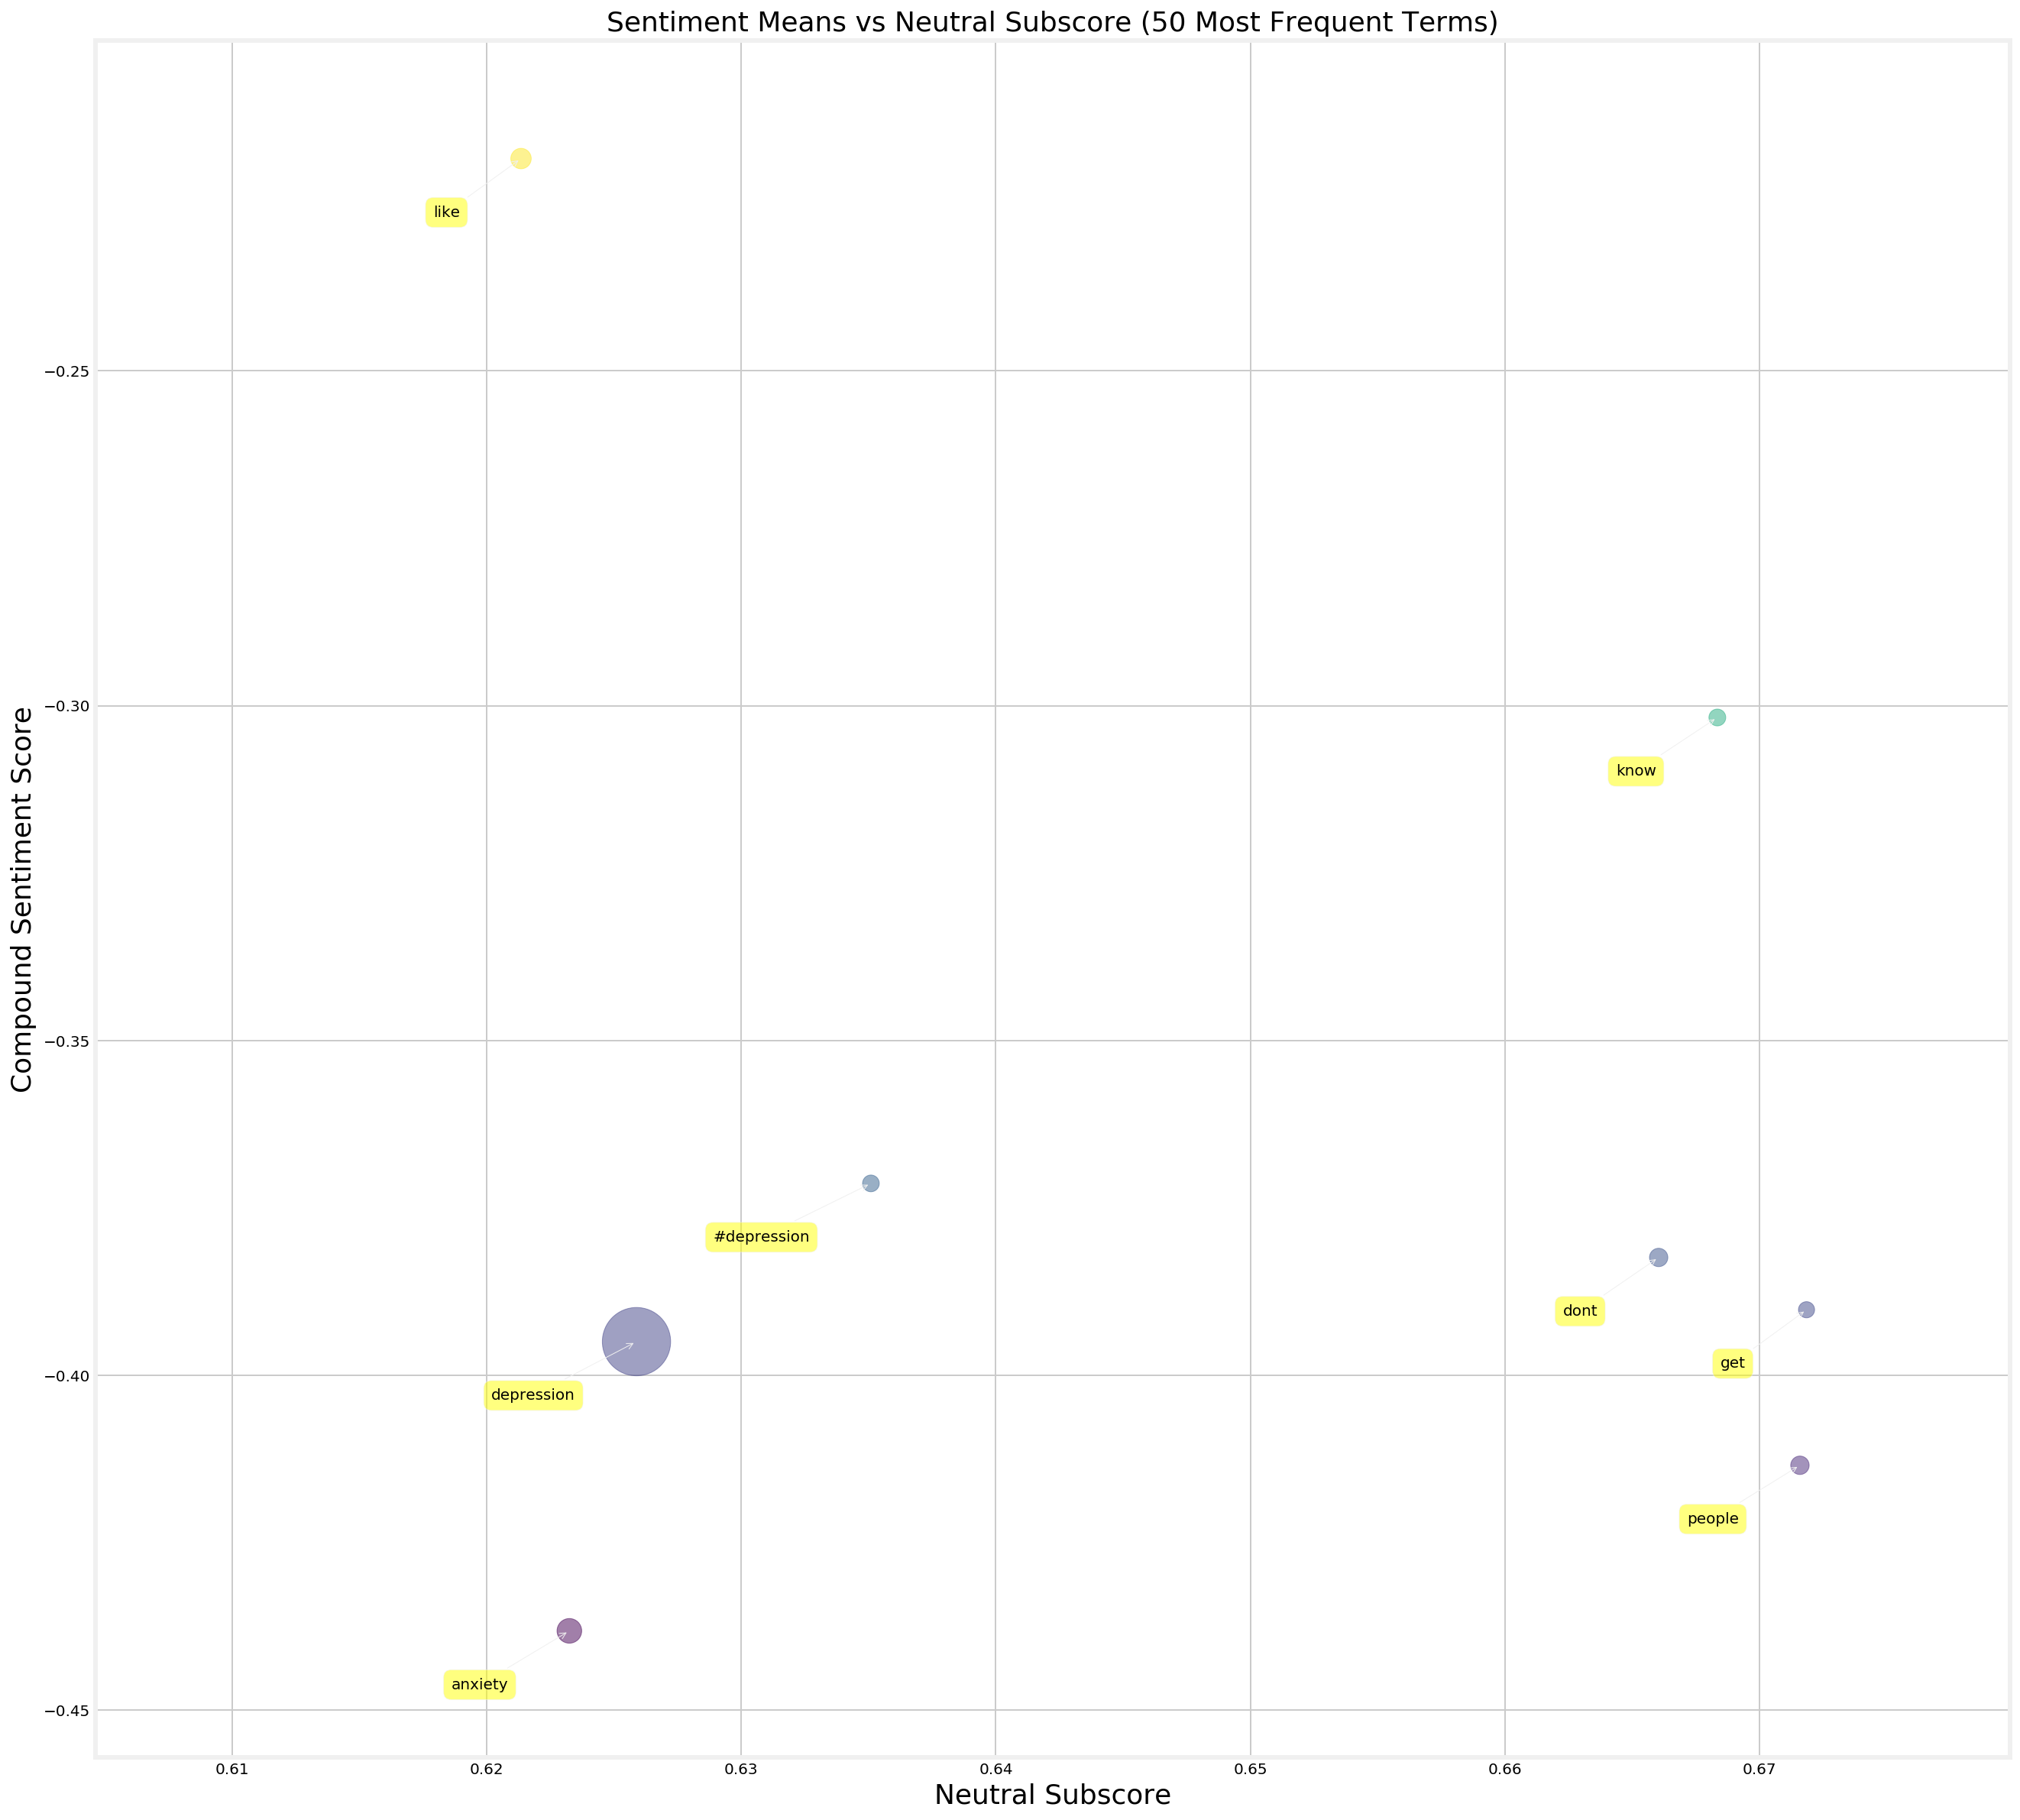

In [180]:
plt.figure(figsize=(20,20))

x = SMF['neu']
y = SMF['compound']
colors = SMF['compound']
area = (SMF['frequency']) 

labels = [i for i in SMF['word']]
plt.subplots_adjust(bottom = 0.1)

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# Add title and axis names
plt.title('Sentiment Means vs Neutral Subscore (50 Most Frequent Terms)',fontsize=18)
plt.xlabel('Neutral Subscore',fontsize=18)
plt.ylabel('Compound Sentiment Score',fontsize=18)

for label, x, y in zip(labels, SMF['neu'], SMF['compound']):
    flip = 2
    if x < .83: flip = -2
        
    flop = 2
    if y < 0: flop = -2
    plt.annotate(
        label,
        xy=(x, y), xytext=(20*flip, 20*flop),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()

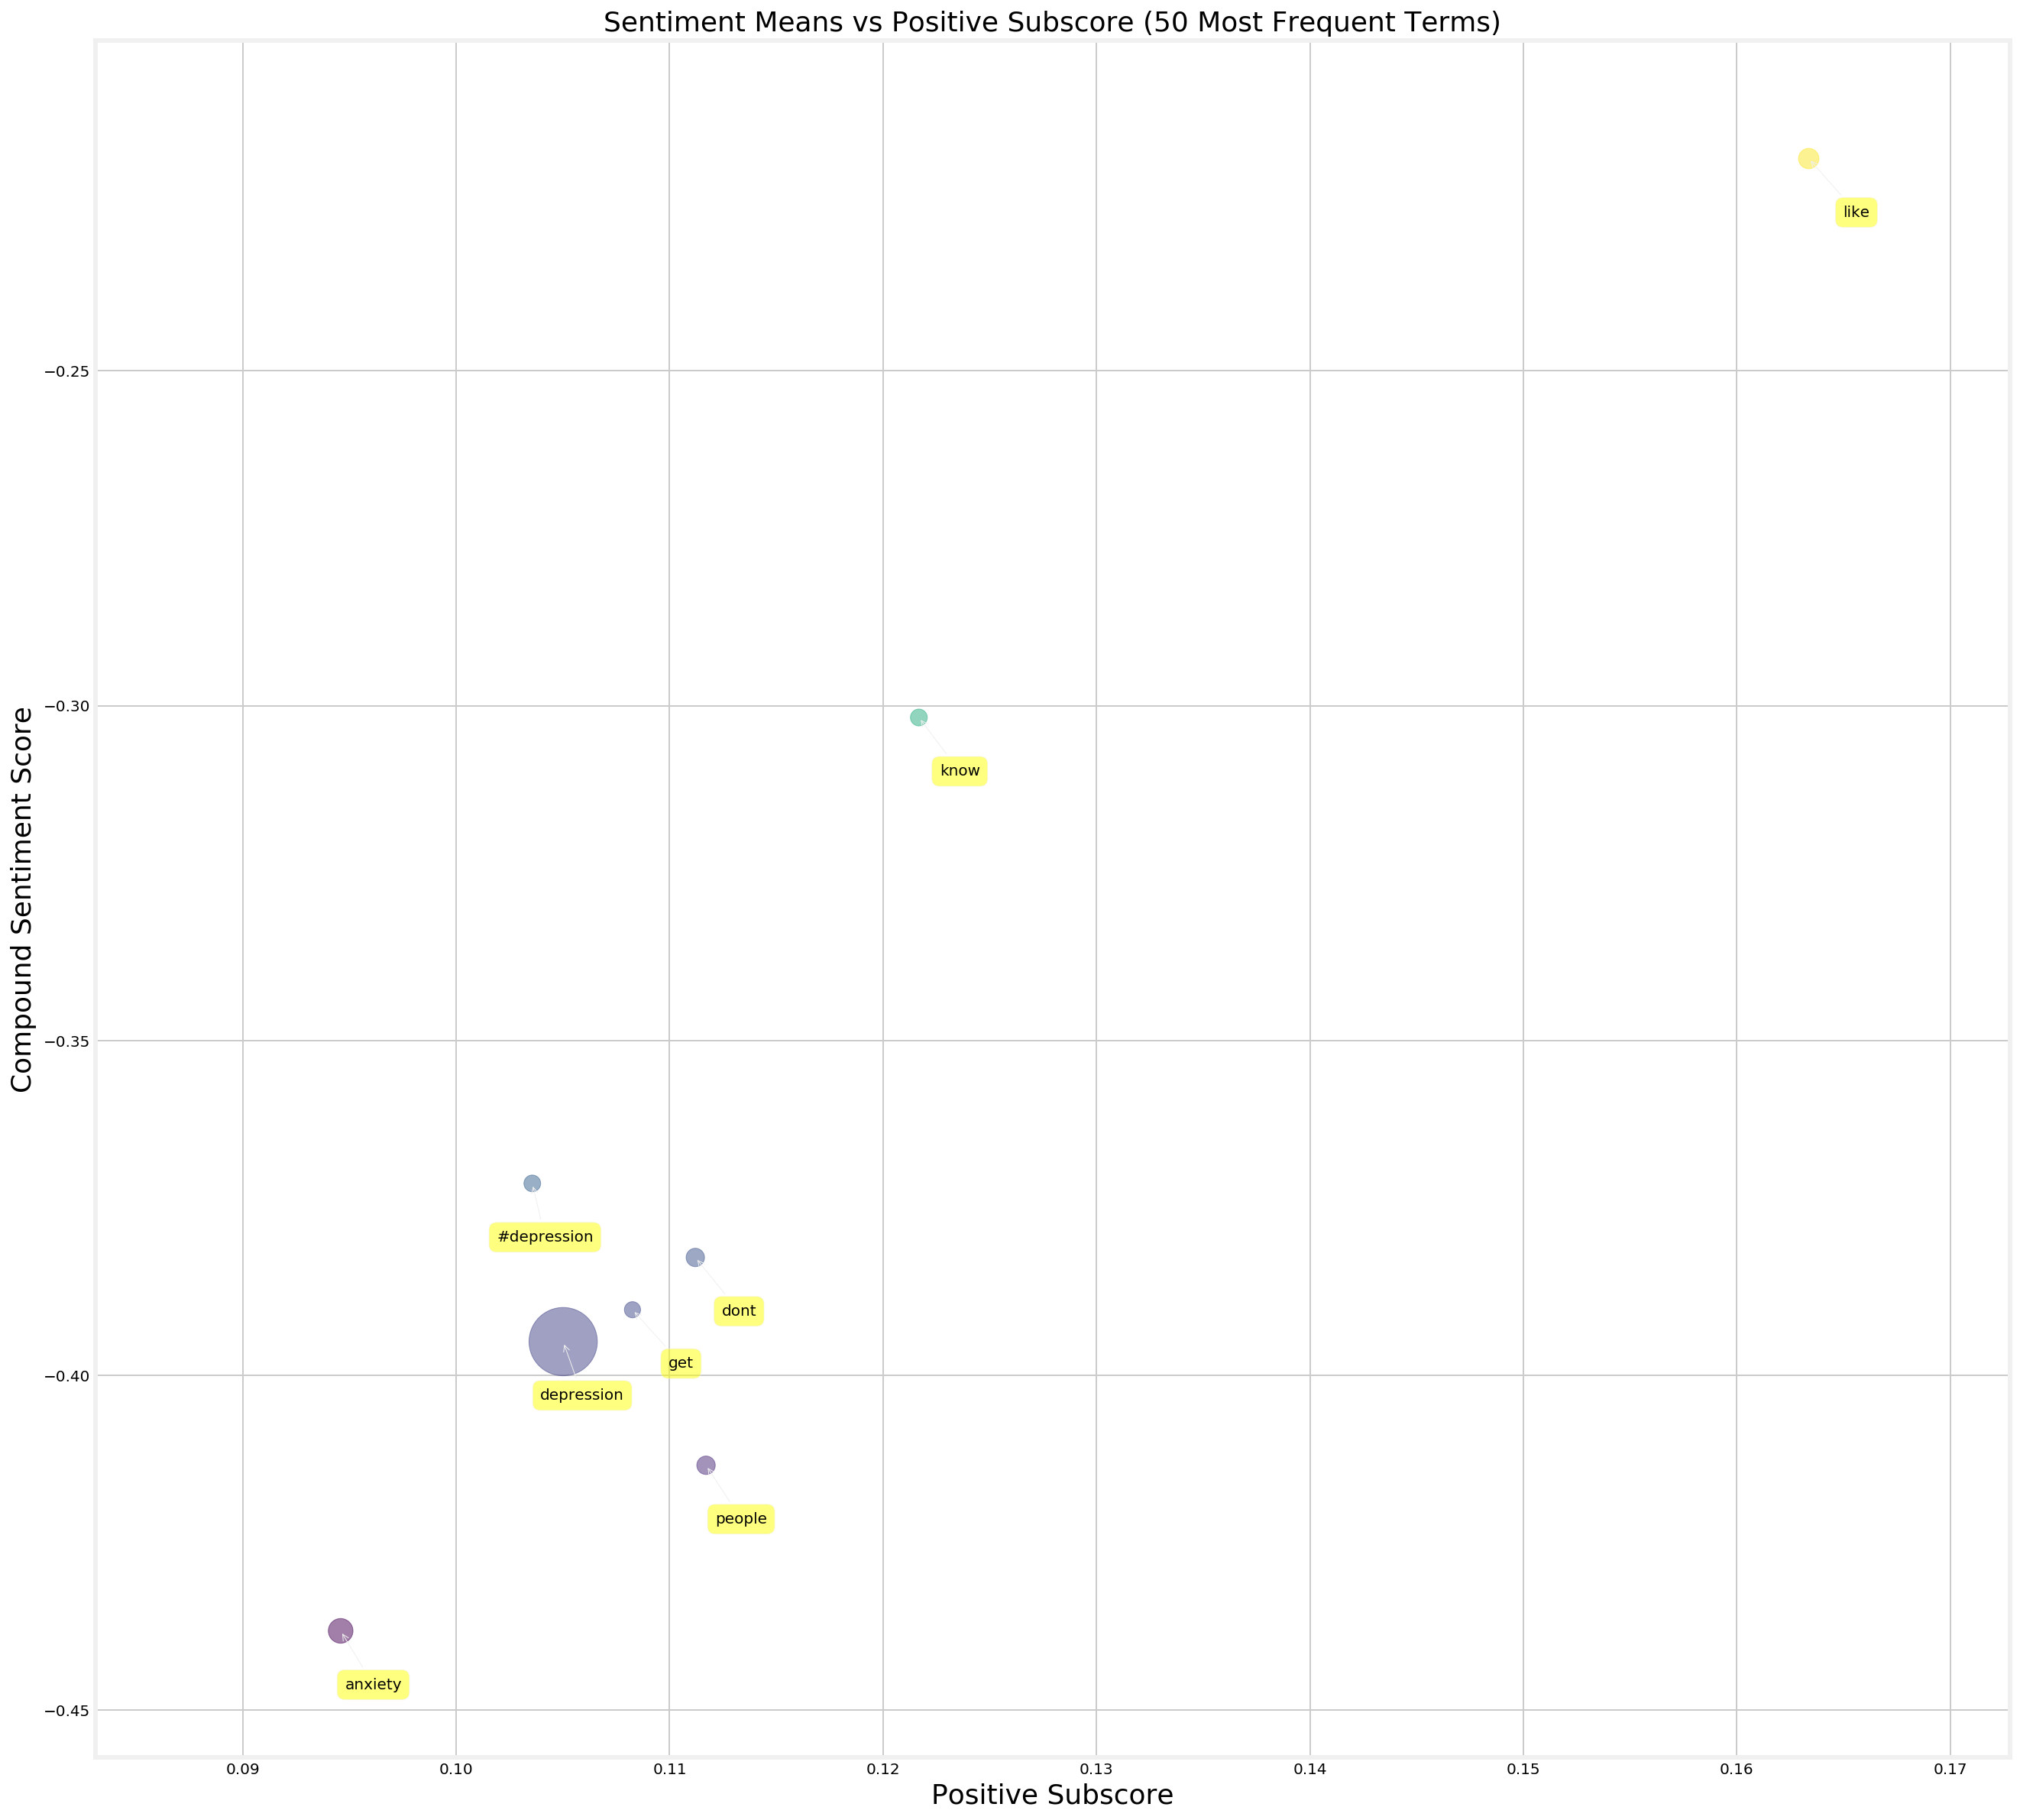

In [181]:
plt.figure(figsize=(20,20))

x = SMF['pos']
y = SMF['compound']
colors = SMF['compound']
area = (SMF['frequency']) 

labels = [i for i in SMF['word']]
plt.subplots_adjust(bottom = 0.1)

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# Add title and axis names
plt.title('Sentiment Means vs Positive Subscore (50 Most Frequent Terms)',fontsize=18)
plt.xlabel('Positive Subscore',fontsize=18)
plt.ylabel('Compound Sentiment Score',fontsize=18)

for label, x, y in zip(labels, SMF['pos'], SMF['compound']):
    flip = 2
    if x < .08: flip = -2
        
    flop = 2
    if y < 0: flop = -2
    plt.annotate(
        label,
        xy=(x, y), xytext=(20*flip, 20*flop),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()


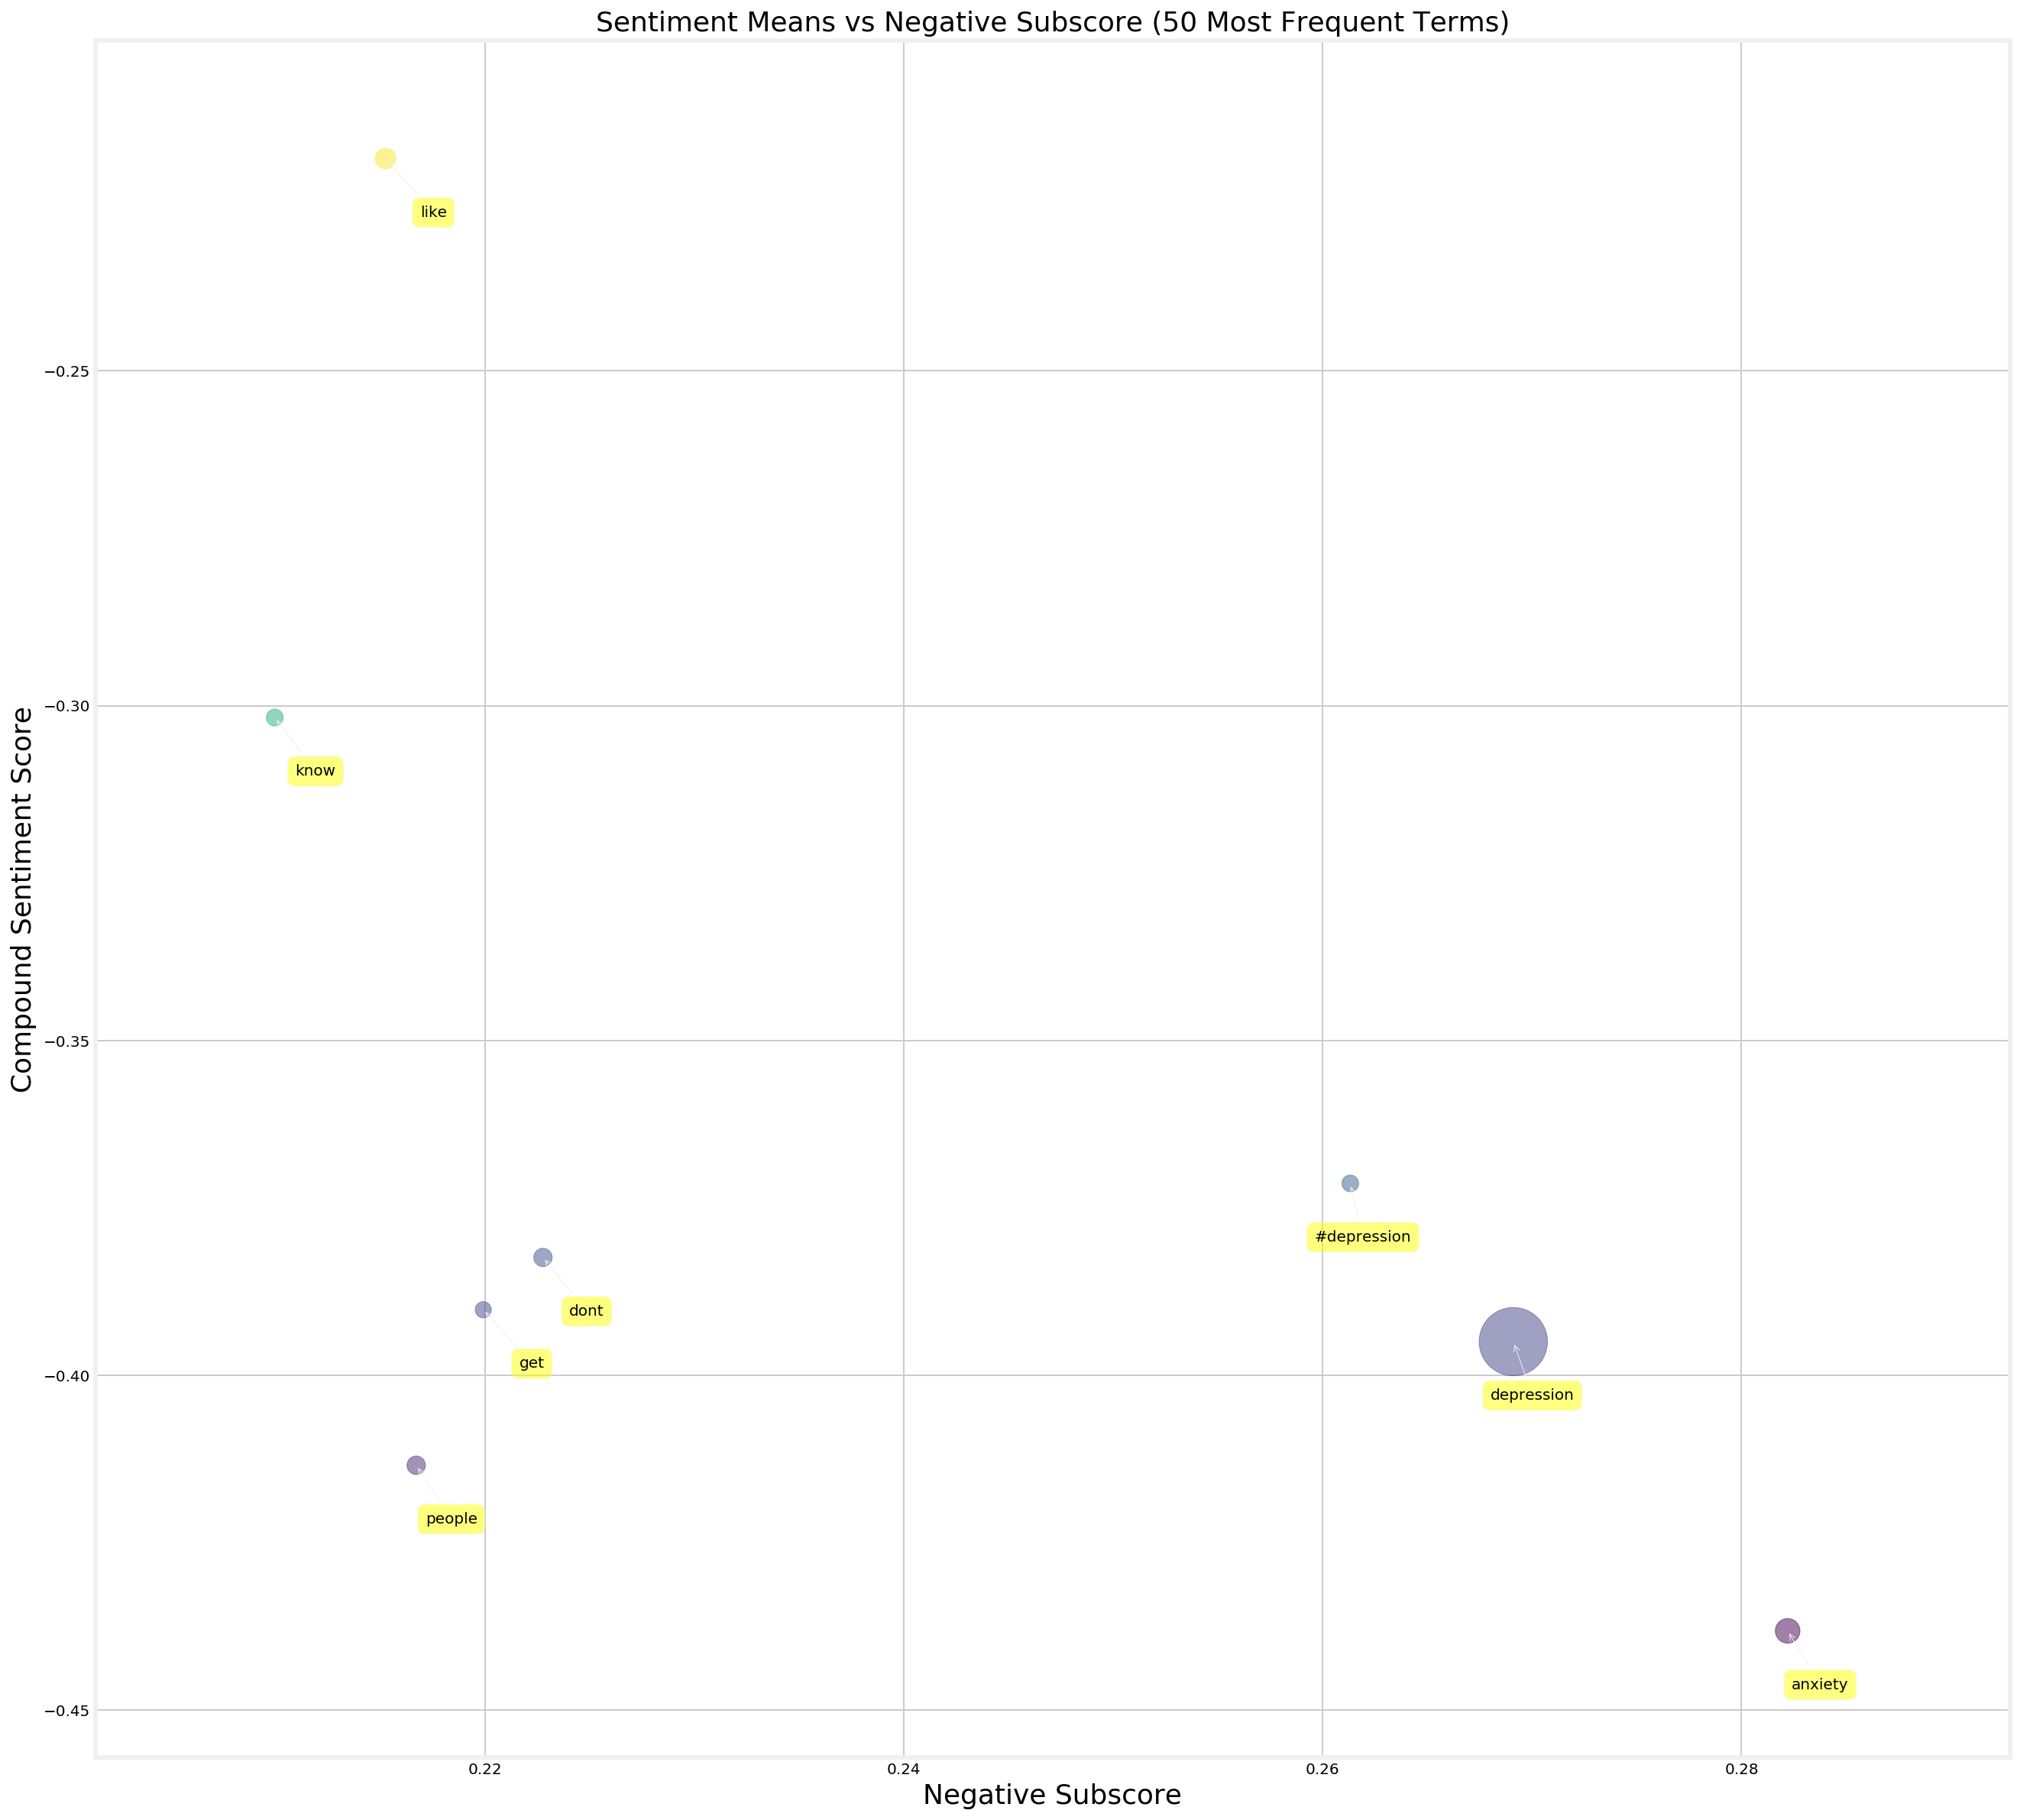

In [182]:
plt.figure(figsize=(20,20))

x = SMF['neg']
y = SMF['compound']
colors = SMF['compound']
area = (SMF['frequency']) 

labels = [i for i in SMF['word']]
plt.subplots_adjust(bottom = 0.1)

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# Add title and axis names
plt.title('Sentiment Means vs Negative Subscore (50 Most Frequent Terms)',fontsize=18)
plt.xlabel('Negative Subscore',fontsize=18)
plt.ylabel('Compound Sentiment Score',fontsize=18)

for label, x, y in zip(labels, SMF['neg'], SMF['compound']):
    flip = 2
    if x < .08: flip = -2
        
    flop = 2
    if y < 0: flop = -2
    plt.annotate(
        label,
        xy=(x, y), xytext=(20*flip, 20*flop),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()


In [107]:
#check 10 normal tweets
normal=tweets[tweets['label']==0]
normal.head(10)

Unnamed: 0  \
0         106   
1         217   
2         220   
3         288   
4         540   
5         624   
6         701   
7         808   
8        1193   
9        1324   

                                                                                                                   message  \
0                                                                just had a real good moment. i missssssssss him so much,    
1                                                                               is reading manga  http://plurk.com/p/mzp1e   
2                                     @comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8    
3  @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting...   
4                                                                            ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
5                                                                                    so sleepy. good times tonight though    
6            @SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now    
7                                                                                    23 or 24Ã¯Â¿Â½C possible today. Nice    
8                                                                              nite twitterville  workout in the am  -ciao   
9                                                                          @daNanner Night, darlin'!  Sweet dreams to you    

   label  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      0  
8      0  
9      0

Top 20 most unique words used from the dataset 

 Word  Frequency
   to       2510
  the       2453
    a       2015
    I       1902
  you       1390
  and       1346
  for       1176
   my       1121
   is        972
   in        929
    i        898
   of        889
   it        827
   on        741
 with        648
 have        569
   so        567
 that        557
   be        514
   me        503




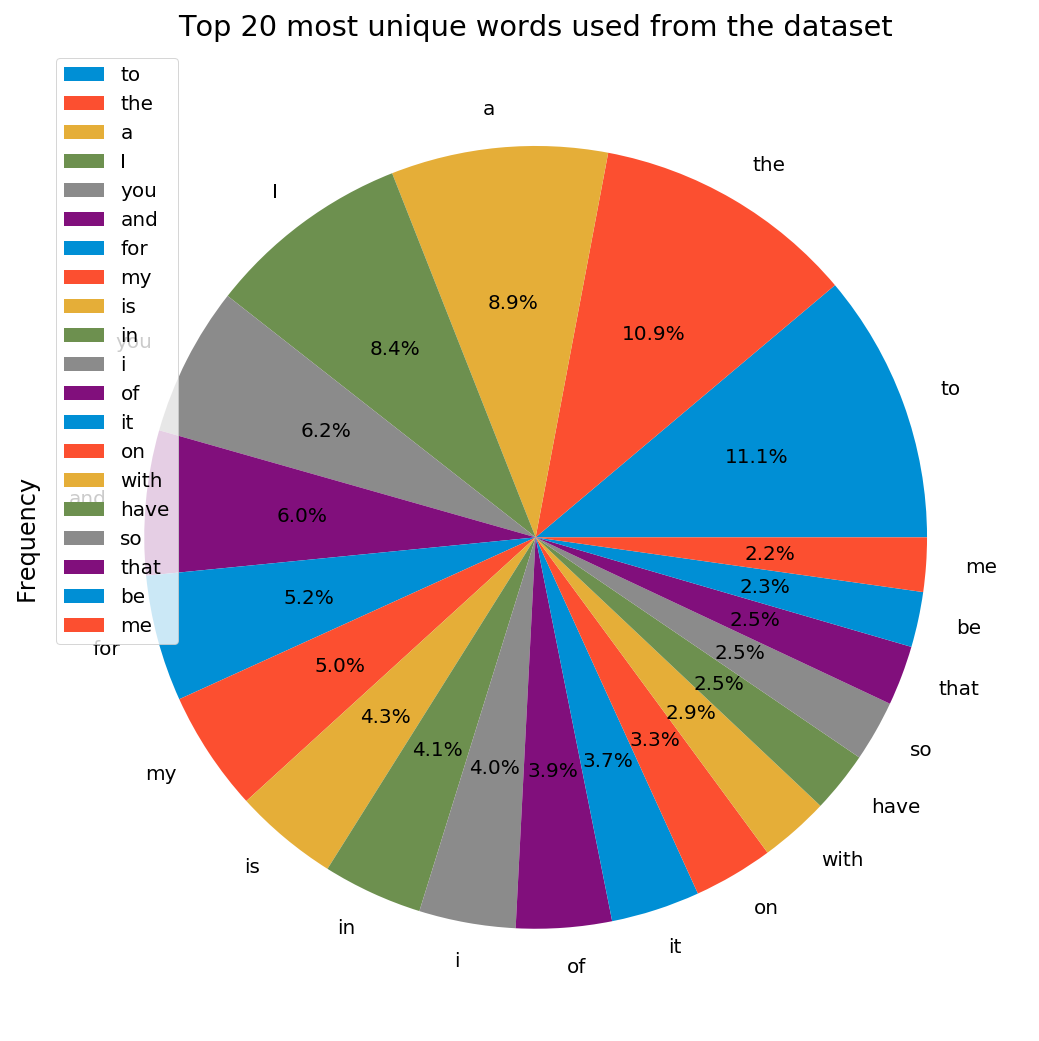

In [108]:
#Find top 20 frequently used words in normal message
no_top_unique_words = "20" 

result = Counter(" ".join(normal['message'].values.tolist()).split(" ")).items()
df2 = pd.DataFrame(result)
df2.columns =['Word', 'Frequency']
df2 = df2[df2.Word != ""] #Deletes the empty spaces counted
df2 = df2.sort_values(['Frequency'], ascending=[False]) #Sort dataframe by frequency (Descending)

print('\033[1mTop '+no_top_unique_words+' most unique words used from the dataset\033[0m \n')
print(df2.head(int(no_top_unique_words)).to_string(index=False)) #Prints the top N unique words used
print("\n")
df3 = df2.head(int(no_top_unique_words))
df3.plot(y='Frequency', kind='pie', labels=df3['Word'], figsize=(9, 9), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used from the dataset')

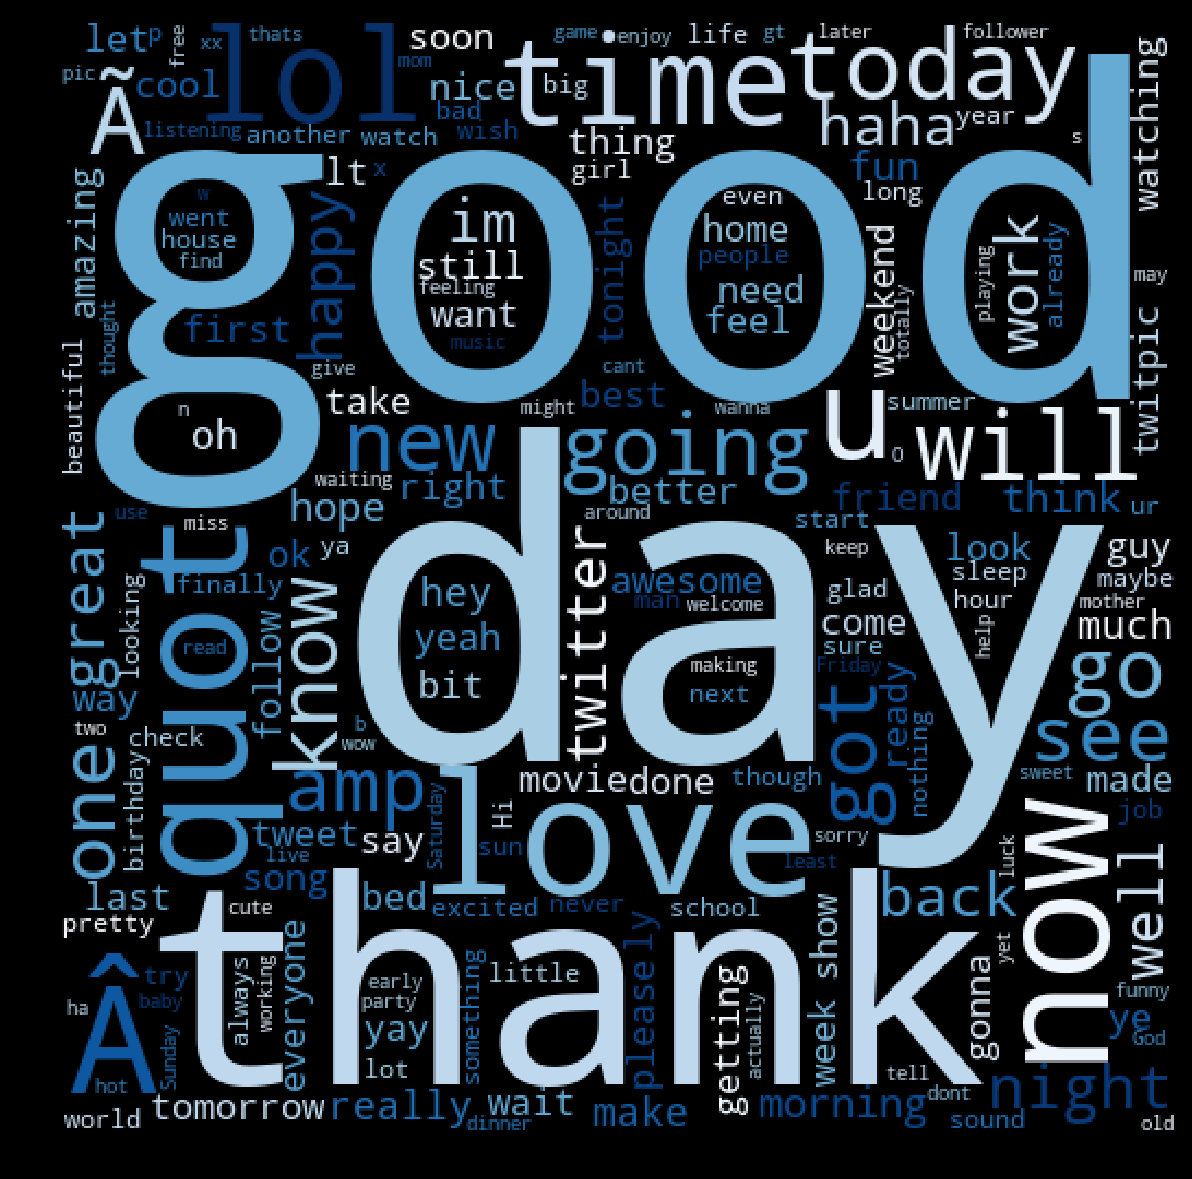

In [109]:
positive_words = ' '.join(list(tweets[tweets['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

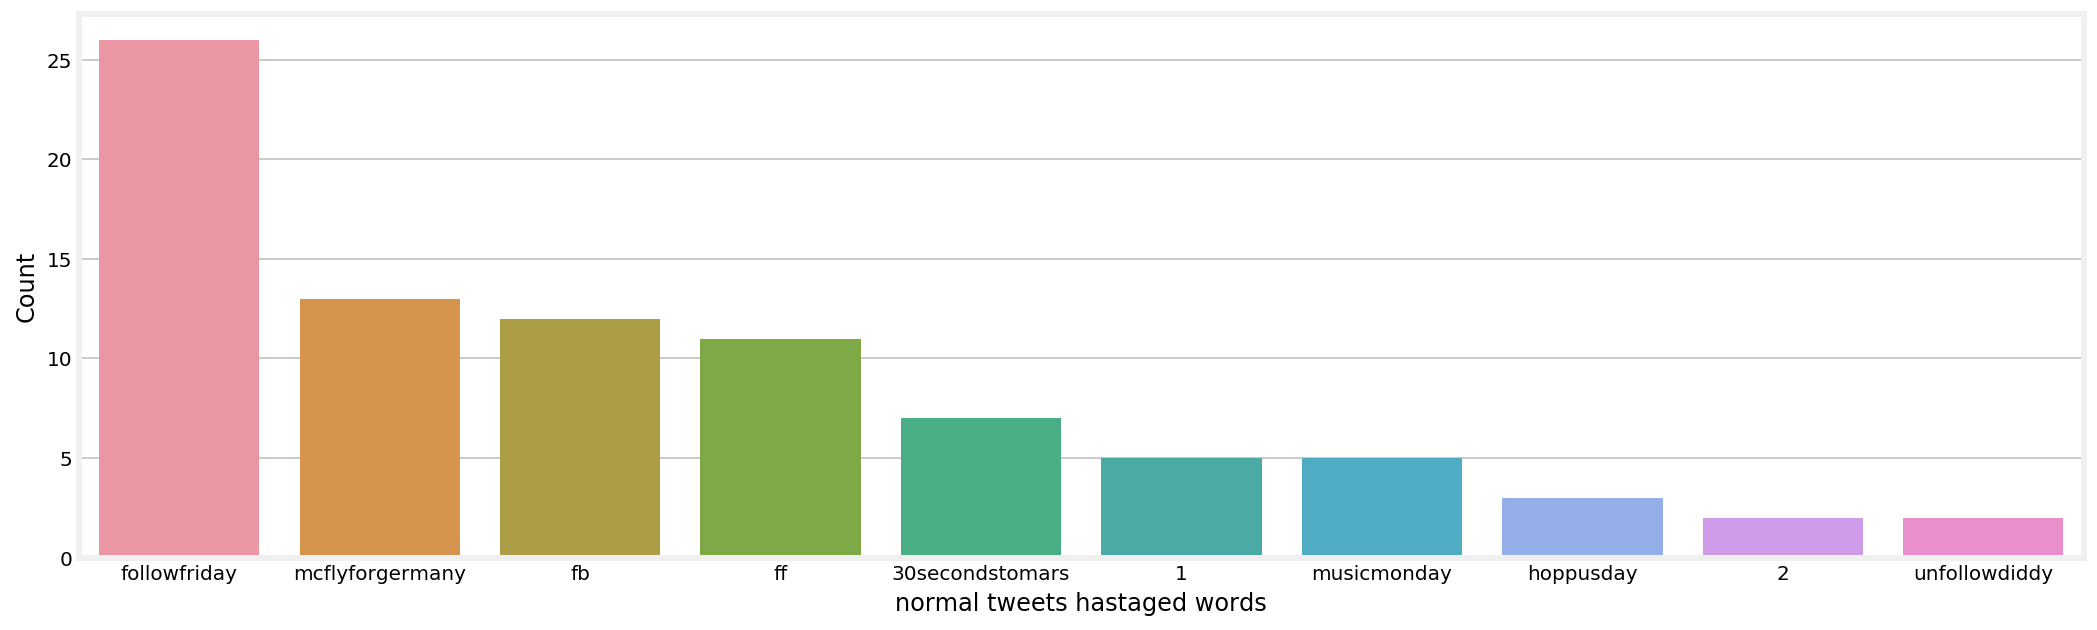

In [110]:
# collecting the # linked words in normal tweets

def ht_extract(x):
    hts = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hts.append(ht)

    return hts

ht_regular = ht_extract(normal['message'].str.lower())

# unnesting list
ht_regular = sum(ht_regular,[])

a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({'hts': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count",n=10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "hts", y = "Count")
ax.set(ylabel = 'Count',xlabel='normal tweets hastaged words')
plt.show()


In [111]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#define a function for testing.
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [112]:
#Briefly overview a few tweets to get better idea
features = normal.iloc[:, 1].values 
print(features)

['just had a real good moment. i missssssssss him so much, '
 'is reading manga  http://plurk.com/p/mzp1e'
 '@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8 '
 ...
 '@shwood loved the cameo, made me chuckle! along with your SXSW talk over the past couple of shows '
 'lol. i just realized my room has a color theme. green is definitely growing in on me. go green! hahaha. i still love purple though! '
 'ReCoVeRiNg FrOm ThE lOnG wEeKeNd ']


In [113]:
#remove rows with no tweet text to analyze
features = [x for x in features if x is not None]

features = [re.sub(r'[\n]', ' ', x) for x in features] #remove \m line breaks
features = [re.sub(r'&amp;', ' ', x) for x in features] #remove ampersand trash code
features = [re.sub(r':', ' ', x) for x in features] #remove colons that appear after retweet mentions
features = [re.sub(r'https', ' ', x) for x in features] #remove https as a word, resulting from above
features = [re.sub(r"[\"\'’….,]", '', x) for x in features] #remove many special characters, including special apostrophe
features = [re.sub(r"^RT ", '', x) for x in features] #remove RT (retweet symbol)

#keep a copy of the original set for reference and troubleshooting
scores = features

#make a dataframe for use later.
features2 = pd.DataFrame(features)
features2.columns = ['message']

#the most problematic tweet text-wise; this originally contained \n throughout.
samp = features2.loc[[999]].to_string()
print(sentiment_analyzer_scores(samp))

                                                                                                                     message
999  In a Drill Sergeants voice  everybody wake the fuck UP!!! *flicks on everyones lights* its 500 est rise and shine be... {'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'compound': -0.6571}
None


In [114]:
#Tweets classification, positive, negative, and neutrual
i=0
for feature in scores:
    vs = analyzer.polarity_scores(feature)
    scores[i] = ("{}".format(str(vs)))
    i+=1

In [115]:
scores2 = pd.DataFrame(scores)
scores2.columns = ['scores']
scores2['scores'] = scores2['scores'].astype(str)

f = lambda x: x["scores"].split("'neg': ")[1].split(",")[0]
scores2['neg']  = scores2.apply(f, axis=1)

f = lambda x: x["scores"].split("'neu': ")[1].split(",")[0]
scores2['neu']  = scores2.apply(f, axis=1)

f = lambda x: x["scores"].split("'pos': ")[1].split(",")[0]
scores2['pos']  = scores2.apply(f, axis=1)

f = lambda x: x["scores"].split("'compound': ")[1].split("}")[0]
scores2['compound']  = scores2.apply(f, axis=1)

scores2 = scores2.drop("scores", axis = 1)

scores2.head(5)

neg    neu    pos compound
0  0.0  0.775  0.225   0.4404
1  0.0    1.0    0.0      0.0
2  0.0    1.0    0.0      0.0
3  0.0  0.879  0.121   0.4404
4  0.0    1.0    0.0      0.0

In [116]:
features_scores = features2.join(scores2) #merge

#convert to numeric for sorting
features_scores[['pos','neg','neu','compound']] = features_scores[['pos','neg','neu','compound']].apply(pd.to_numeric)

#sort the dataframe
features_scores = features_scores.sort_values('compound',ascending=False)

#expand the display of the column
pd.options.display.max_colwidth = 120
features_scores.head(10)

message  \
2194  Happy Friday!!!!  I hope all are doing wellthe darling son (5) has decided that we should have a cookout - happy hap...   
3218  Back from a fantastic birthday gathering in Hyde Park Full of sunshine fantastic food and pure glee Awesome friends ...   
5499  @Kaijah Thanks I appreciate your thoughts and comments on what I post much love peace joy and blessings to you and y...   
290   Sammy If your reading this You are amazing Your my Sunshine I love you Thanks for everything And I bet you feel the ...   
2471      Casey graduates highschool 2nite! Im proud of you I love you   I wish you the best! Congrats! Enjoy it!  C u 2nite!   
1679  @maeband Amazing show in Salt Lake! Loved it super special awesome! So many words to describe it!  Thank you for all...   
3003                                so great to have friends who support the things you love doing  feels good love you guys    
285                   Happy Sunday to all! Getting ready to go to church!  I LOVE GOD SO MUCH!!!! DO U? Take care friends!!!    
5821  @muffinwomanxo Yes kristen stewart is pretty much a tramp but im glad you admitted you love Twilight  I love you eve...   
2106                                     hope everyone has a fabulous friday and a happy   safe holiday weekend! XOXO SUMMER    

        neg    neu    pos  compound  
2194  0.000  0.390  0.610    0.9810  
3218  0.000  0.351  0.649    0.9796  
5499  0.000  0.395  0.605    0.9765  
290   0.000  0.476  0.524    0.9720  
2471  0.000  0.421  0.579    0.9718  
1679  0.035  0.420  0.545    0.9708  
3003  0.000  0.339  0.661    0.9701  
285   0.000  0.395  0.605    0.9699  
5821  0.000  0.446  0.554    0.9688  
2106  0.000  0.279  0.721    0.9667

In [117]:
features_scores_terms.tail(10)

tweet_text  \
210   Chris never holds that incident against anyone but himself even though he was sexually assaulted and assaulted Why? ...   
1370  Molestation Attempted suicide twice  YALL DEPRESSION <Emoji  Loudly crying face> Do not live your life according to ...   
29    Feel so empty Worthless Failure Hopeless Unwanted A joke Fuck up Embarrassment #depression #borderlinepersonality #m...   
1309  #LatestNews from  http //MobileWebCitycomÃ‚Â    Negative thoughts and destructive emotions can bring pain unhappines...   
2208  wrap me tight in rice-paper string http //archiveofourownorg/works/11717343Ã‚Â Ã¢Â€Â¢ NAMJIN namjoon-centric (76k)Ã¢...   
1272  fren  i have depressionme  have u been diagnosed?fren  i know i have depressionme  yea but have u been diagnosed??fr...   
146   insulting people who actually struggle with depression and suicidal thoughts everyday idc who started the rumor but ...   
1522  my name is katy im diagnosed with chronic depression and panic disorder my anxiety gets so bad that i get panic atta...   
1673  Depression works very much like this*minor inconvenience/stressful situation happens*My brain  *banging pots togethe...   
698   suicide is not a joke depression is not a joke mental illness is not a joke QUIT FAKING SUICIDES FOR CLOUT NOTICES A...   

        neg    neu    pos  compound  
210   0.355  0.579  0.066   -0.9682  
1370  0.384  0.554  0.062   -0.9683  
29    0.735  0.202  0.063   -0.9696  
1309  0.534  0.466  0.000   -0.9712  
2208  0.393  0.607  0.000   -0.9817  
1272  0.396  0.604  0.000   -0.9822  
146   0.449  0.551  0.000   -0.9855  
1522  0.573  0.367  0.060   -0.9856  
1673  0.698  0.241  0.061   -0.9861  
698   0.514  0.427  0.058   -0.9875

In [119]:
features_scores['compound'].mean()

0.33103724999999296

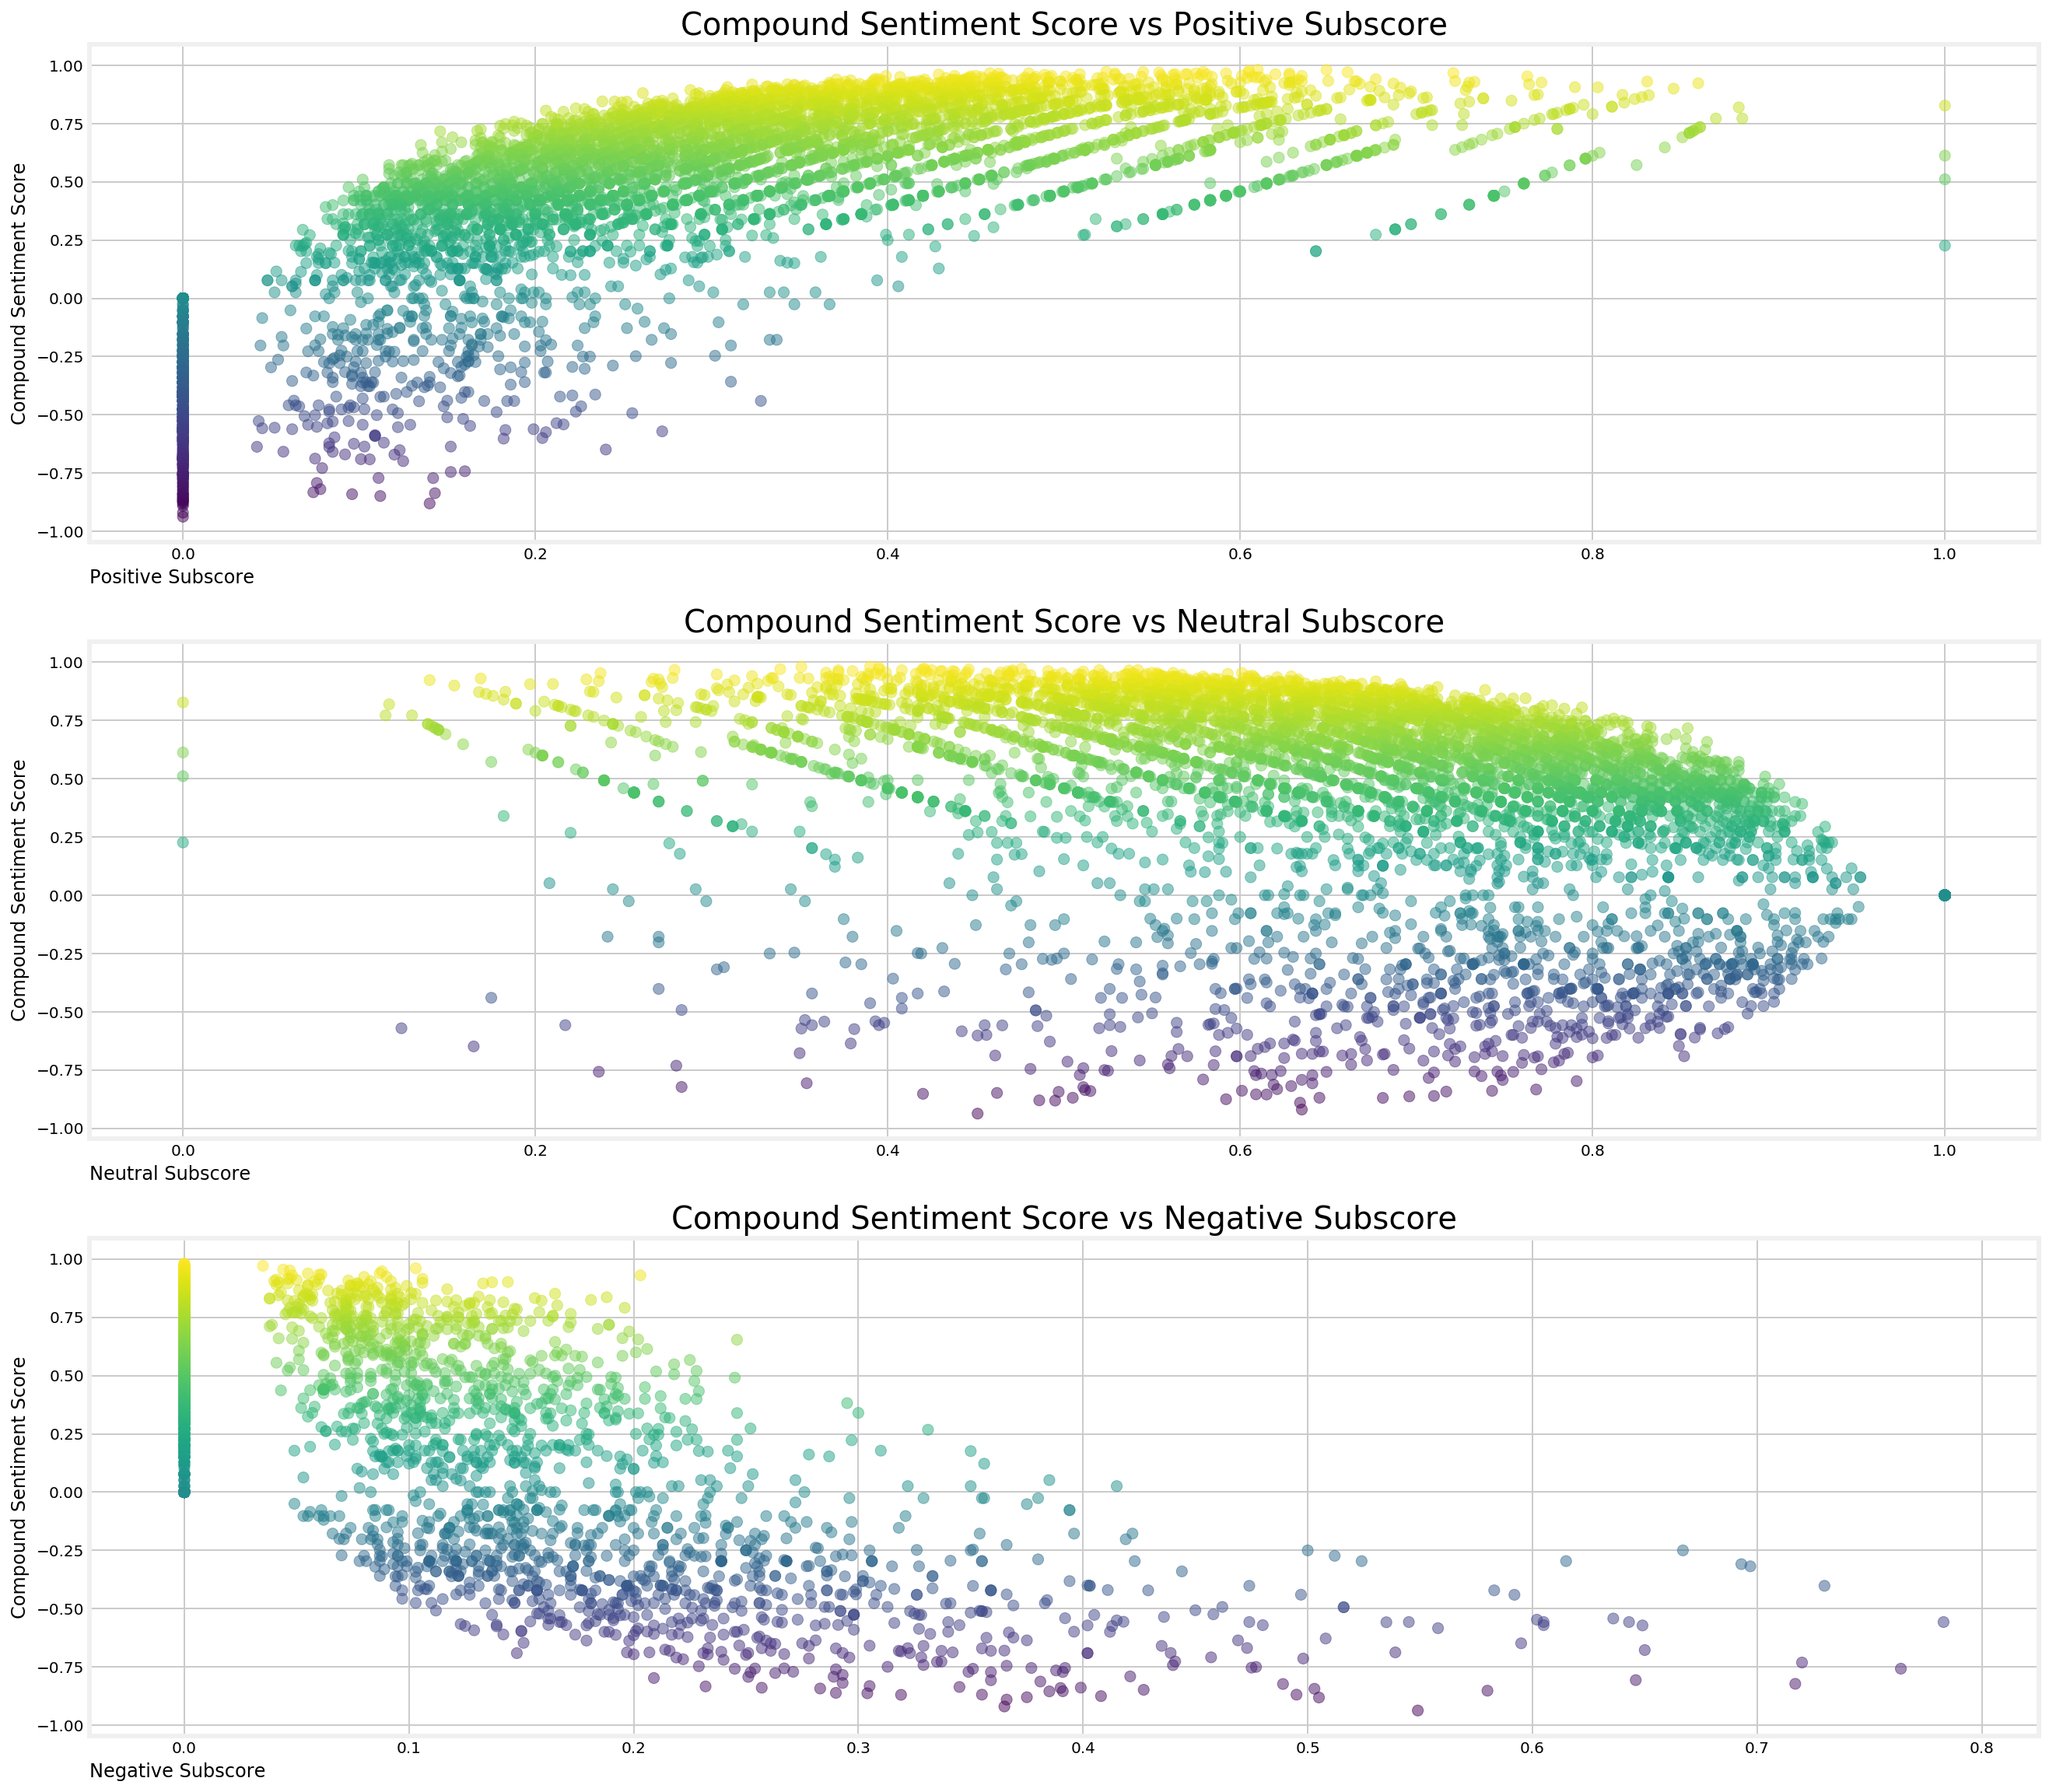

In [120]:
from matplotlib.transforms import Bbox, TransformedBbox, \
    blended_transform_factory

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize=(20,20)) #set sixe of figure

# Compound Score versus positive score
x1 = features_scores['pos']
y1 = features_scores['compound']
colors1 = features_scores['compound']
area1 = (50)  

#define subplot
plt.subplot(3, 1, 1)
plt.scatter(x1, y1, s=area1, c=colors1, alpha=0.5)

# Add title and axis names
plt.title('Compound Sentiment Score vs Positive Subscore',fontsize=20)
plt.xlabel('Positive Subscore',fontsize=12,horizontalalignment='left',x=0.0)
plt.ylabel('Compound Sentiment Score',fontsize=12)

#Compound Score versus neutral score
x2 = features_scores['neu']
y2 = features_scores['compound']
colors2 = features_scores['compound']
area2 = (50) 

plt.subplot(3, 1, 2)
plt.scatter(x2, y2, s=area2, c=colors2, alpha=0.5)

# Add title and axis names and adjust fontsize
plt.title('Compound Sentiment Score vs Neutral Subscore',fontsize=20)
plt.xlabel('Neutral Subscore',fontsize=12,horizontalalignment='left',x=0.0)
plt.ylabel('Compound Sentiment Score',fontsize=12)

#Compound Score versus negative score
x3 = features_scores['neg']
y3 = features_scores['compound']
colors3 = features_scores['compound']
area3 = (50)  # 0 to 15 point radii

plt.subplot(3, 1, 3)
plt.scatter(x3, y3, s=area3, c=colors3, alpha=0.5)

# Add title and axis names
plt.title('Compound Sentiment Score vs Negative Subscore',fontsize=20)
plt.xlabel('Negative Subscore',fontsize=12,horizontalalignment='left',x=0.0)
plt.ylabel('Compound Sentiment Score',fontsize=12)

plt.show()

In [123]:
features_scores.head()

message  \
2194  Happy Friday!!!!  I hope all are doing wellthe darling son (5) has decided that we should have a cookout - happy hap...   
3218  Back from a fantastic birthday gathering in Hyde Park Full of sunshine fantastic food and pure glee Awesome friends ...   
5499  @Kaijah Thanks I appreciate your thoughts and comments on what I post much love peace joy and blessings to you and y...   
290   Sammy If your reading this You are amazing Your my Sunshine I love you Thanks for everything And I bet you feel the ...   
2471      Casey graduates highschool 2nite! Im proud of you I love you   I wish you the best! Congrats! Enjoy it!  C u 2nite!   

      neg    neu    pos  compound  
2194  0.0  0.390  0.610    0.9810  
3218  0.0  0.351  0.649    0.9796  
5499  0.0  0.395  0.605    0.9765  
290   0.0  0.476  0.524    0.9720  
2471  0.0  0.421  0.579    0.9718

In [124]:
# calculate frequency by word
word_freq = pd.DataFrame(features_scores.message.str.split(expand=True).stack().value_counts())

#reset index, rename columns, format
word_freq.reset_index(level=0, inplace=True)
word_freq.columns = ['word','frequency']
word_freq['frequency'] = word_freq['frequency'].apply(pd.to_numeric)

#filter out words of less than two characters in length.
word_freq2 = word_freq[word_freq['word'].apply(lambda x: len(x) > 2)]

#filter words that appear less frequently than 100 times in the tweets
word_freq3 = word_freq2[word_freq2.frequency > 100]

#view result
word_freq3.head(10)

word  frequency
1    the       2456
4    you       1486
5    and       1351
6    for       1180
14  with        650
15  that        595
17  have        575
21  http        470
22  your        460
23  just        433

In [125]:
pd.options.mode.chained_assignment = None  # default='warn'

#load stopwords
from nltk.corpus import stopwords 
stop = stopwords.words('english')

#convert to lowercase
word_freq3['word'] = word_freq3['word'].str.lower()

#remove stopwords
word_freq4 = word_freq3[~word_freq3['word'].isin(stop)]

#view result
word_freq4.head(10)

word  frequency
21   http        470
25   good        428
29    day        376
30   love        369
35   like        336
36    get        331
45   know        252
46   time        248
50    see        238
51  going        237

In [126]:
remove = ['http']

word_freq5 = word_freq4[~word_freq4['word'].isin(remove)]

word_freq5.head(5)

word  frequency
25  good        428
29   day        376
30  love        369
35  like        336
36   get        331

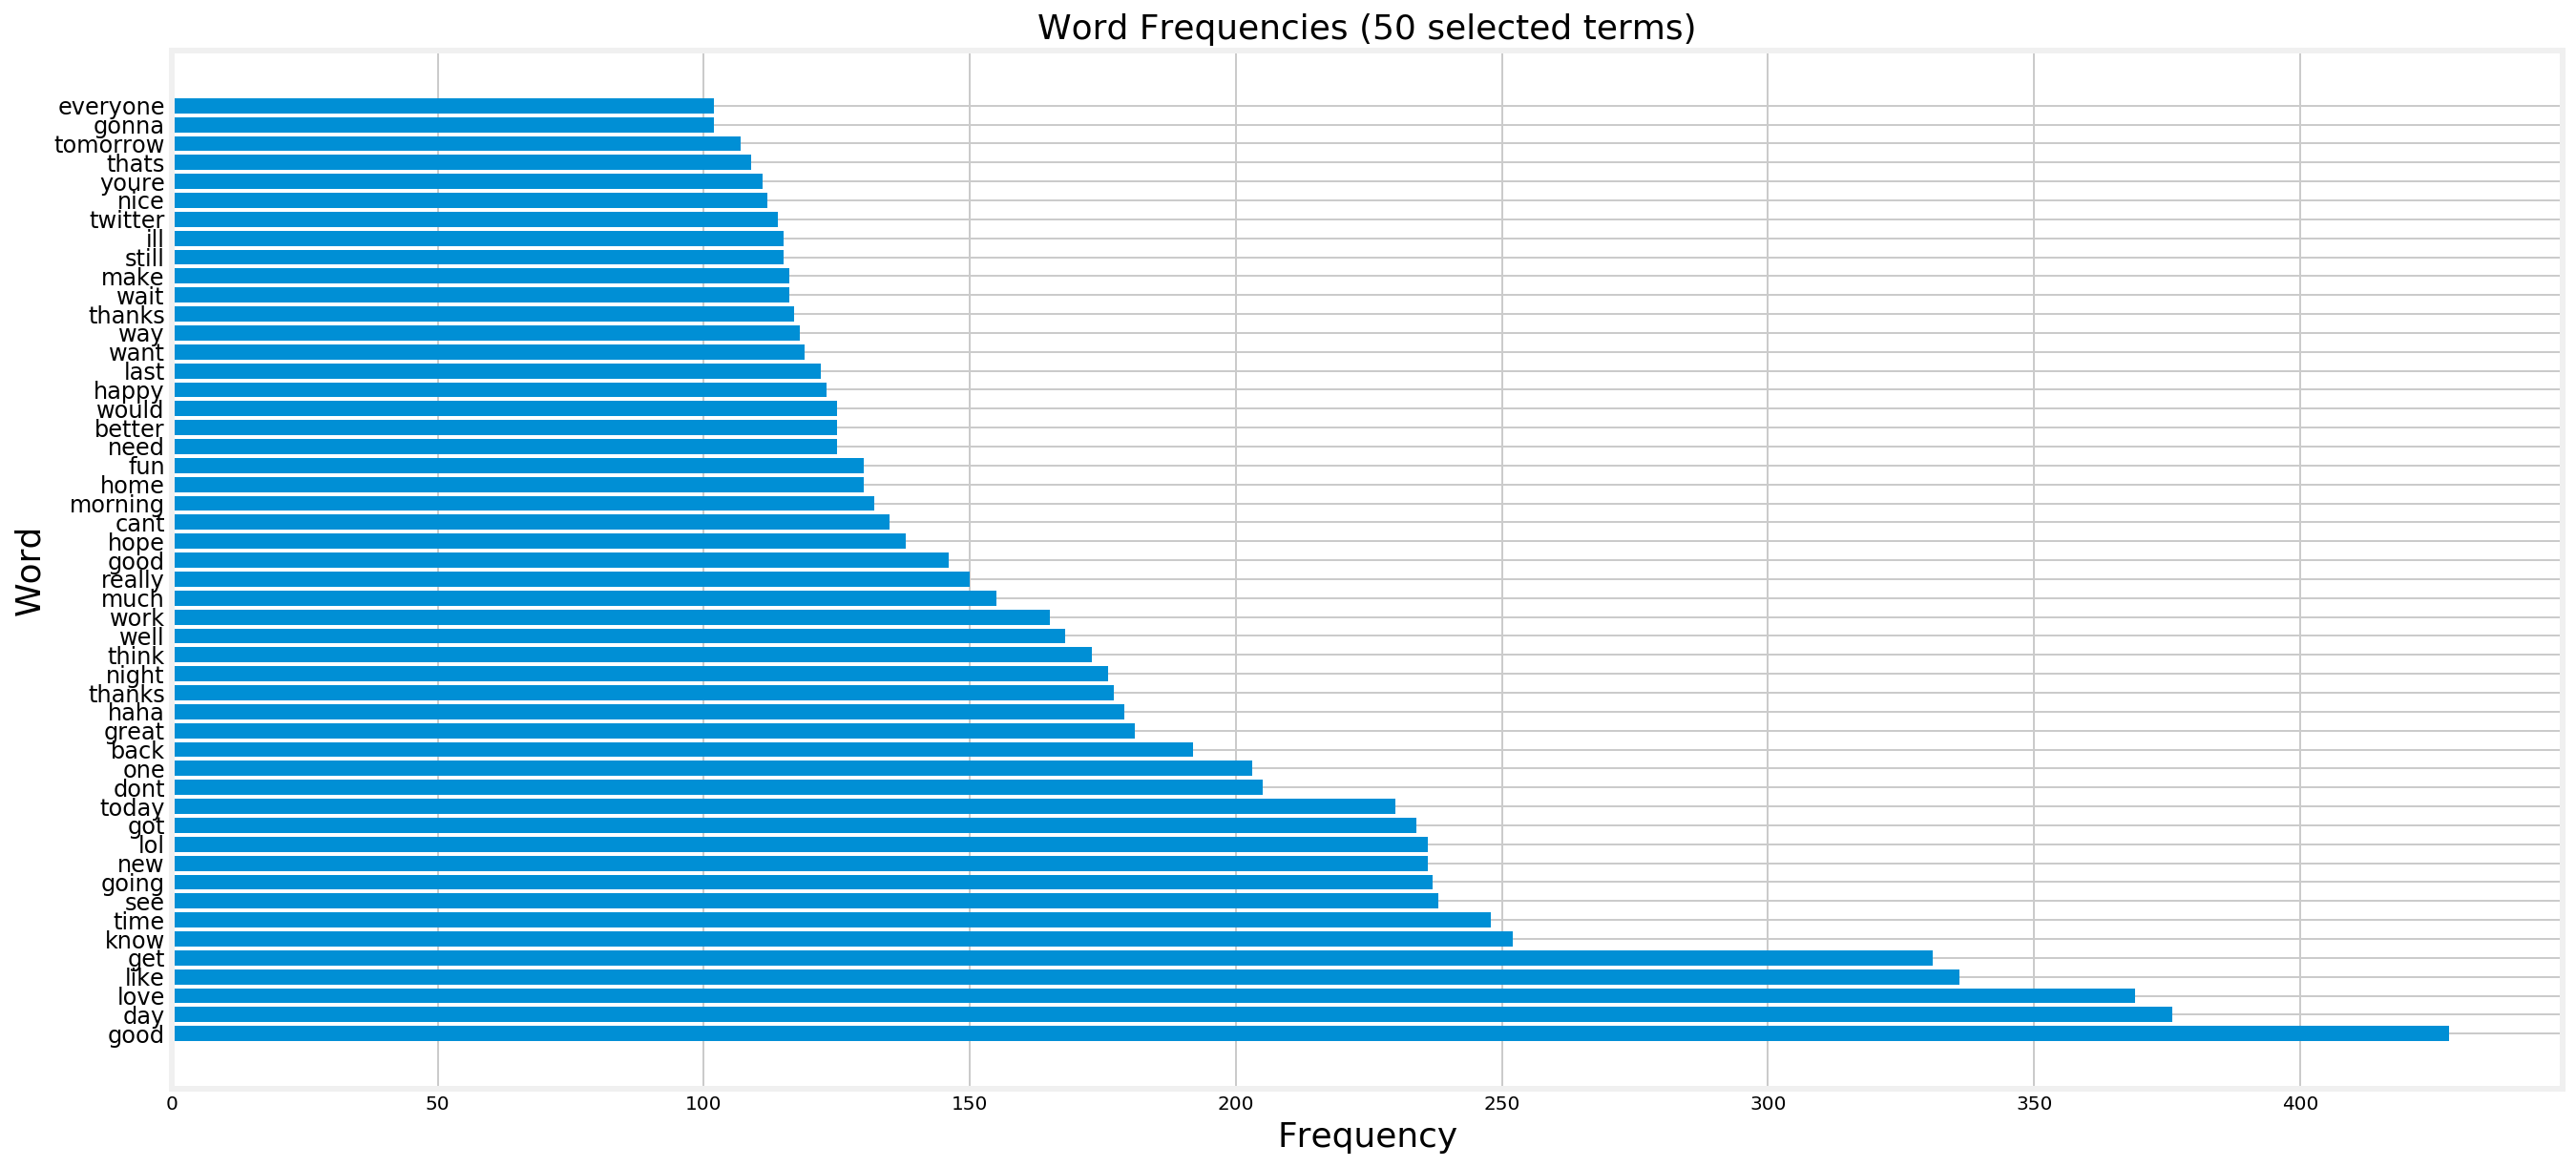

In [127]:
plt.figure(figsize=(20,10))
# this is for plotting purpose
index = np.arange(len(word_freq5['word'][:50]))
plt.barh(index, word_freq5['frequency'][:50])
plt.ylabel('Word', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.yticks(index, word_freq5['word'][:50], fontsize=12, rotation=0)
plt.title('Word Frequencies (50 selected terms)',fontsize=18)
plt.show()

In [128]:
terms = list(word_freq5['word'][:50])
terms_conc = ' | '.join(terms)
print(terms_conc)

good | day | love | like | get | know | time | see | going | new | lol | got | today | dont | one | back | great | haha | thanks | night | think | well | work | much | really | good | hope | cant | morning | home | fun | need | better | would | happy | last | want | way | thanks | wait | make | still | ill | twitter | nice | youre | thats | tomorrow | gonna | everyone


In [130]:
features_scores_terms = features_scores[features_scores['message'].str.contains(terms_conc)==True]

features_scores_terms.head(10)

message  \
2194  Happy Friday!!!!  I hope all are doing wellthe darling son (5) has decided that we should have a cookout - happy hap...   
5499  @Kaijah Thanks I appreciate your thoughts and comments on what I post much love peace joy and blessings to you and y...   
290   Sammy If your reading this You are amazing Your my Sunshine I love you Thanks for everything And I bet you feel the ...   
2471      Casey graduates highschool 2nite! Im proud of you I love you   I wish you the best! Congrats! Enjoy it!  C u 2nite!   
3003                                so great to have friends who support the things you love doing  feels good love you guys    
5821  @muffinwomanxo Yes kristen stewart is pretty much a tramp but im glad you admitted you love Twilight  I love you eve...   
2106                                     hope everyone has a fabulous friday and a happy   safe holiday weekend! XOXO SUMMER    
2876  YT It made me so happy You guys are so amazing I love you all Thank you  Oh and goodmorning may your day be as good ...   
149   @amandabynes i really liked it! im ur #1 fan i loved all of ur movies! especially shes the man its so funny! I LOVE ...   
5358          omg im sooo excited!!!! well off to school LAST DAY WOOHOO THIS IS THE BEST DAY EVER thanks to @mileycyrus  lol   

      neg    neu    pos  compound  
2194  0.0  0.390  0.610    0.9810  
5499  0.0  0.395  0.605    0.9765  
290   0.0  0.476  0.524    0.9720  
2471  0.0  0.421  0.579    0.9718  
3003  0.0  0.339  0.661    0.9701  
5821  0.0  0.446  0.554    0.9688  
2106  0.0  0.279  0.721    0.9667  
2876  0.0  0.542  0.458    0.9660  
149   0.0  0.520  0.480    0.9657  
5358  0.0  0.425  0.575    0.9654

In [131]:
features_scores_terms.tail(10)

message  \
4303           @lessthanthreeme the good news  the school related bullshit ends eventually The bad news  bullshit never ends    
5580                                                                              But until the time comesIll die of boredom    
6814                                          @susysu If your are down there this twitter hell thing cant really be that bad    
6199  Jonas Brothers youtube i SUSPENDED indefinately! know how that feels I HATE copyright Saw JB and HM today  Away to w...   
3783  Im a LONE SOLDIER Aha! Thats how I really feel Taking on my own battles   shit Spare me the drama   just let me do it!    
6653  @sockington I dont care what hoomans call me as long as its not &quot;late for dinner&quot;!  No food I get cranky m...   
6614  you know what I fuckin love julz will NOT find NO BITCH greater then me! on some real shit every othr female out the...   
2556                          How rude is Simon Cowell!!???&quot;Your not gonna win&quot;Vote Good Evans! Porve Simon wrong!    
7852  Stupid Maple patch cannot load Created new Audi ac looks so retarded  X Im going to go crazier over Show Luozhixiang...   
2181  Fuck u fridays is here!! Sooo fuck u all on behalf of MFA!!  Brandon is n cali its going down 2nite bitches!!!! YESS...   

        neg    neu    pos  compound  
4303  0.427  0.462  0.112   -0.8481  
5580  0.580  0.420  0.000   -0.8519  
6814  0.391  0.609  0.000   -0.8542  
6199  0.290  0.710  0.000   -0.8611  
3783  0.304  0.696  0.000   -0.8630  
6653  0.319  0.681  0.000   -0.8696  
6614  0.375  0.486  0.140   -0.8800  
2556  0.505  0.495  0.000   -0.8811  
7852  0.366  0.634  0.000   -0.8901  
2181  0.365  0.635  0.000   -0.9196

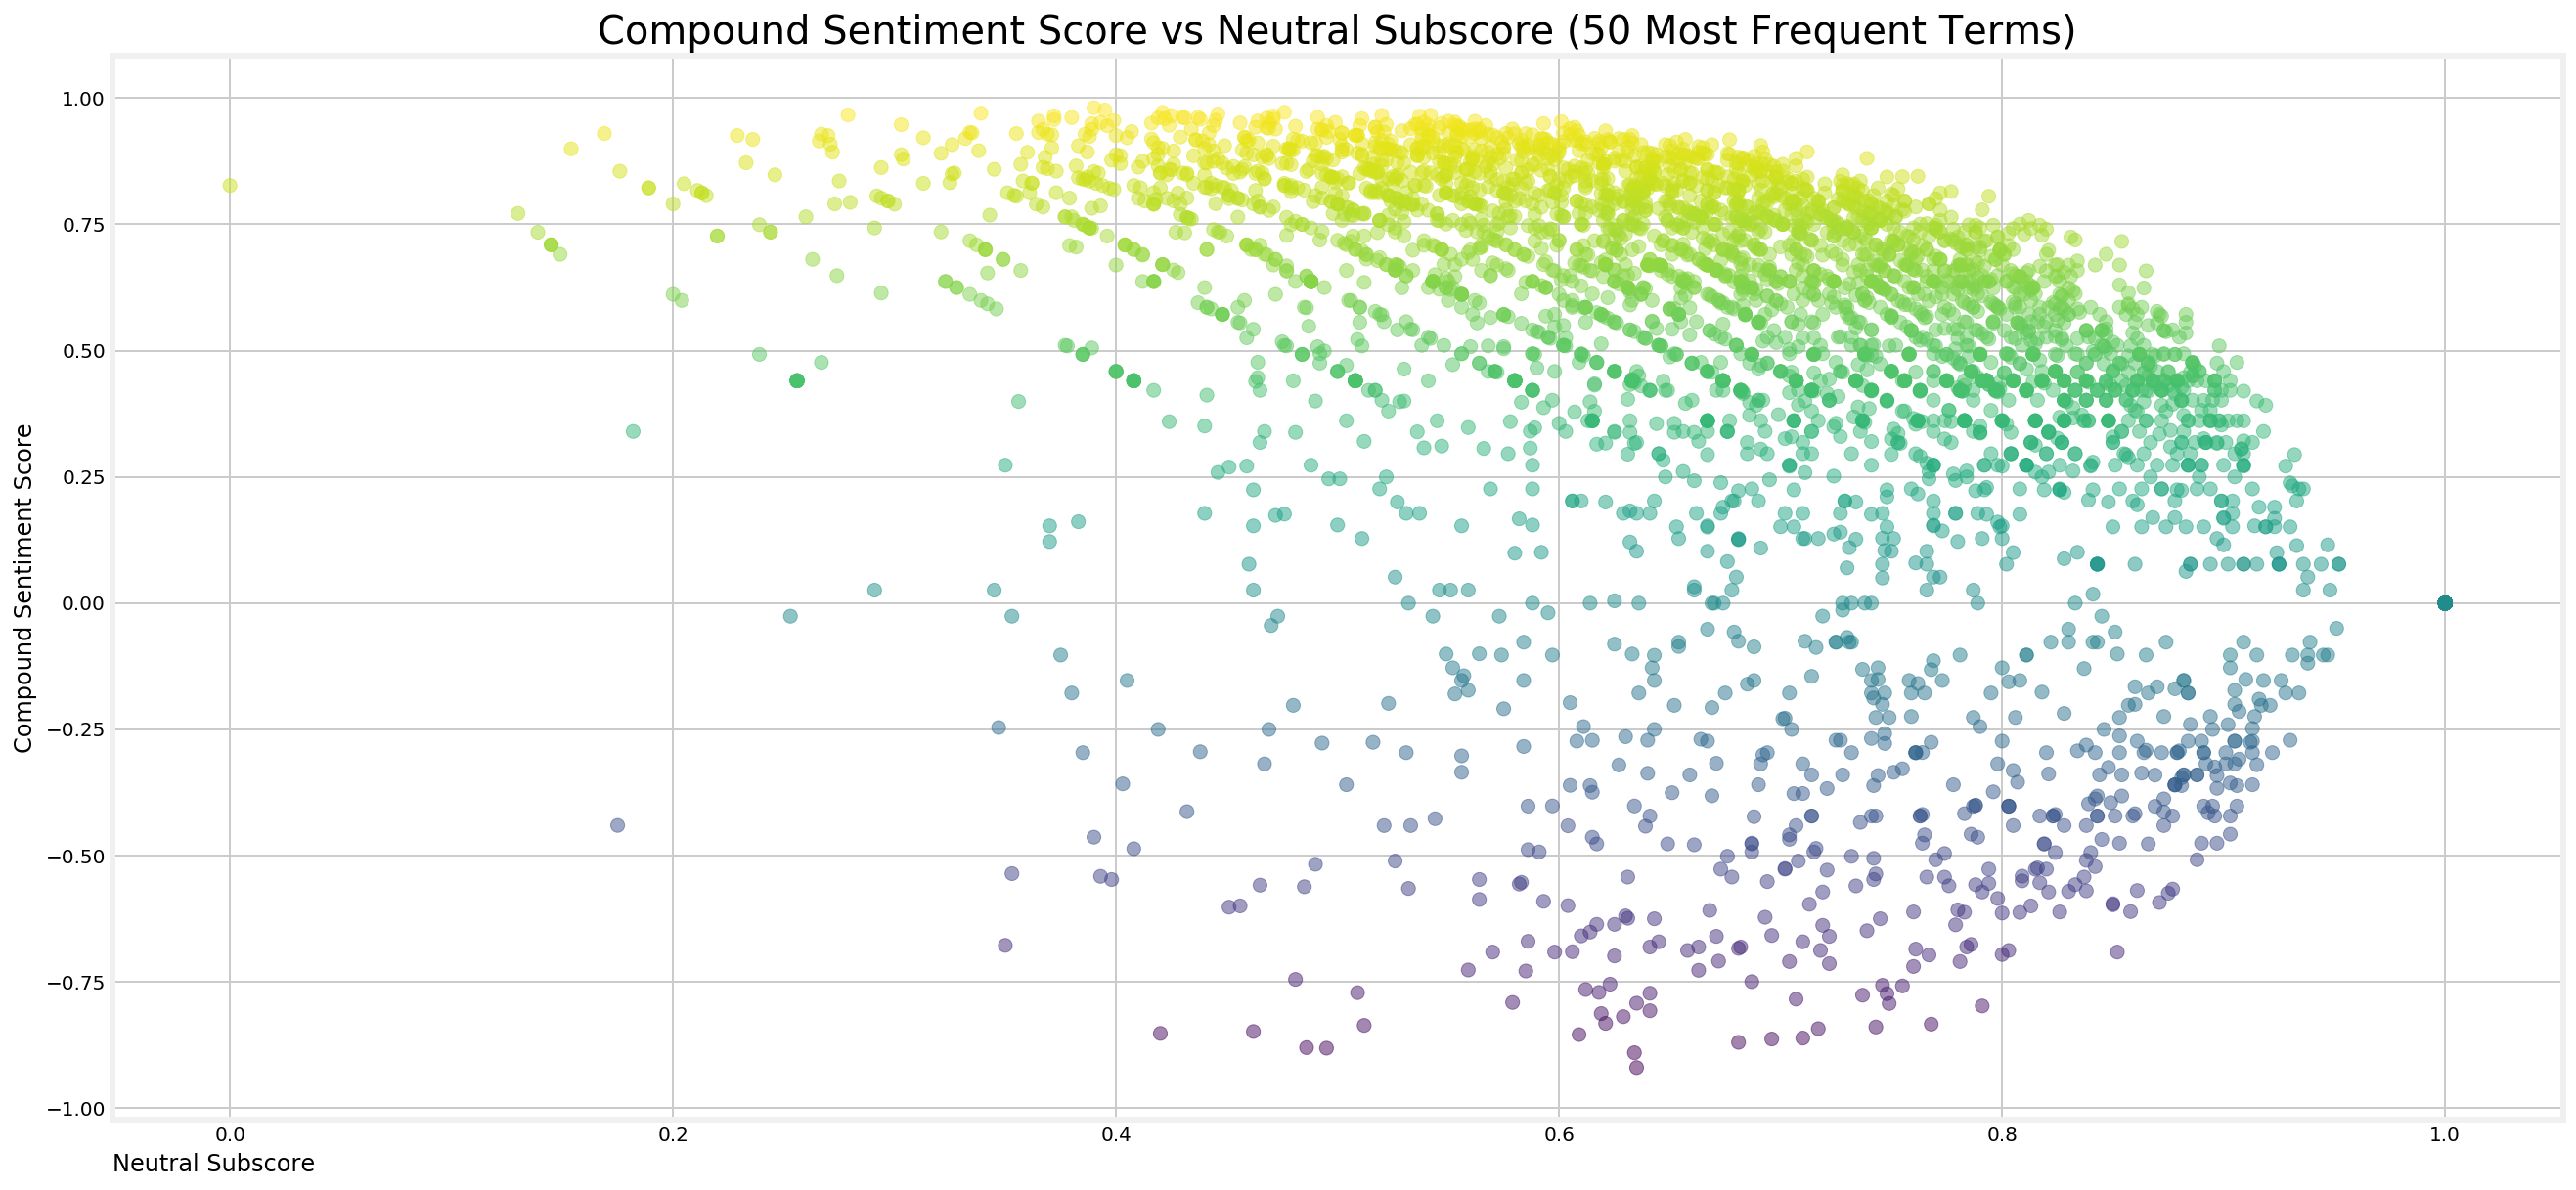

In [132]:
plt.figure(figsize=(20,10))

x = features_scores_terms['neu']
y = features_scores_terms['compound']
colors = features_scores_terms['compound']
area = (50) 

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# Add title and axis names
plt.title('Compound Sentiment Score vs Neutral Subscore (50 Most Frequent Terms)',fontsize=20)
plt.xlabel('Neutral Subscore',fontsize=12,horizontalalignment='left',x=0.0)
plt.ylabel('Compound Sentiment Score',fontsize=12)

plt.show()

In [134]:
features_scores_terms2 = features_scores[features_scores['message'].str.contains(terms_conc)==True]['compound'].mean()

features_scores_terms2

0.40715762529575944

In [136]:
#calculate means for each subscore
sent_means = []
for x in terms:
    sent_means_neg = features_scores[features_scores['message'].str.contains(x)==True]['neg'].mean()
    sent_means_neu = features_scores[features_scores['message'].str.contains(x)==True]['neu'].mean()
    sent_means_pos = features_scores[features_scores['message'].str.contains(x)==True]['pos'].mean()
    sent_means_comp = features_scores[features_scores['message'].str.contains(x)==True]['compound'].mean()
    item = [x,sent_means_neg,sent_means_neu,sent_means_pos,sent_means_comp]
    sent_means.append(item)

In [137]:
sentiment_means = pd.DataFrame(sent_means,columns=['word','neg','neu','pos','compound'])

sentiment_means.head(5)

word       neg       neu       pos  compound
0  good  0.033833  0.640250  0.325938  0.564983
1   day  0.032486  0.734142  0.233373  0.421147
2  love  0.025635  0.600784  0.373585  0.701038
3  like  0.038689  0.666363  0.294956  0.539494
4   get  0.050220  0.762806  0.186986  0.337796

In [138]:
WF50 = word_freq5.reset_index(drop=True)

#preliminary data cleaning
WF50.columns = WF50.columns.str.replace(' ', '')
sentiment_means.columns = sentiment_means.columns.str.replace(' ', '')

#combine duplicate terms in our original frequency dataframe and find sum of frequencies among them
WF50 = WF50.groupby('word').apply(lambda x: pd.Series(dict(frequency=(x.frequency.sum()))))

#prepare for merge
left = WF50
right = sentiment_means

#merge
SMF = pd.merge(left,right,on='word')
SMF = SMF.dropna()
SMF = SMF.drop_duplicates()

#sort by compound score
SMF = SMF.sort_values('compound',ascending=False)

SMF.head(5)

word  frequency       neg       neu       pos  compound
13   great        181  0.023985  0.590209  0.385811  0.748292
23    love        369  0.025635  0.600784  0.373585  0.701038
15   happy        123  0.026620  0.595860  0.377512  0.695814
17    hope        138  0.030777  0.598851  0.370377  0.672647
35  thanks        294  0.025182  0.548365  0.426429  0.627943

In [139]:
SMF['compound'].mean()

0.42045604112277074

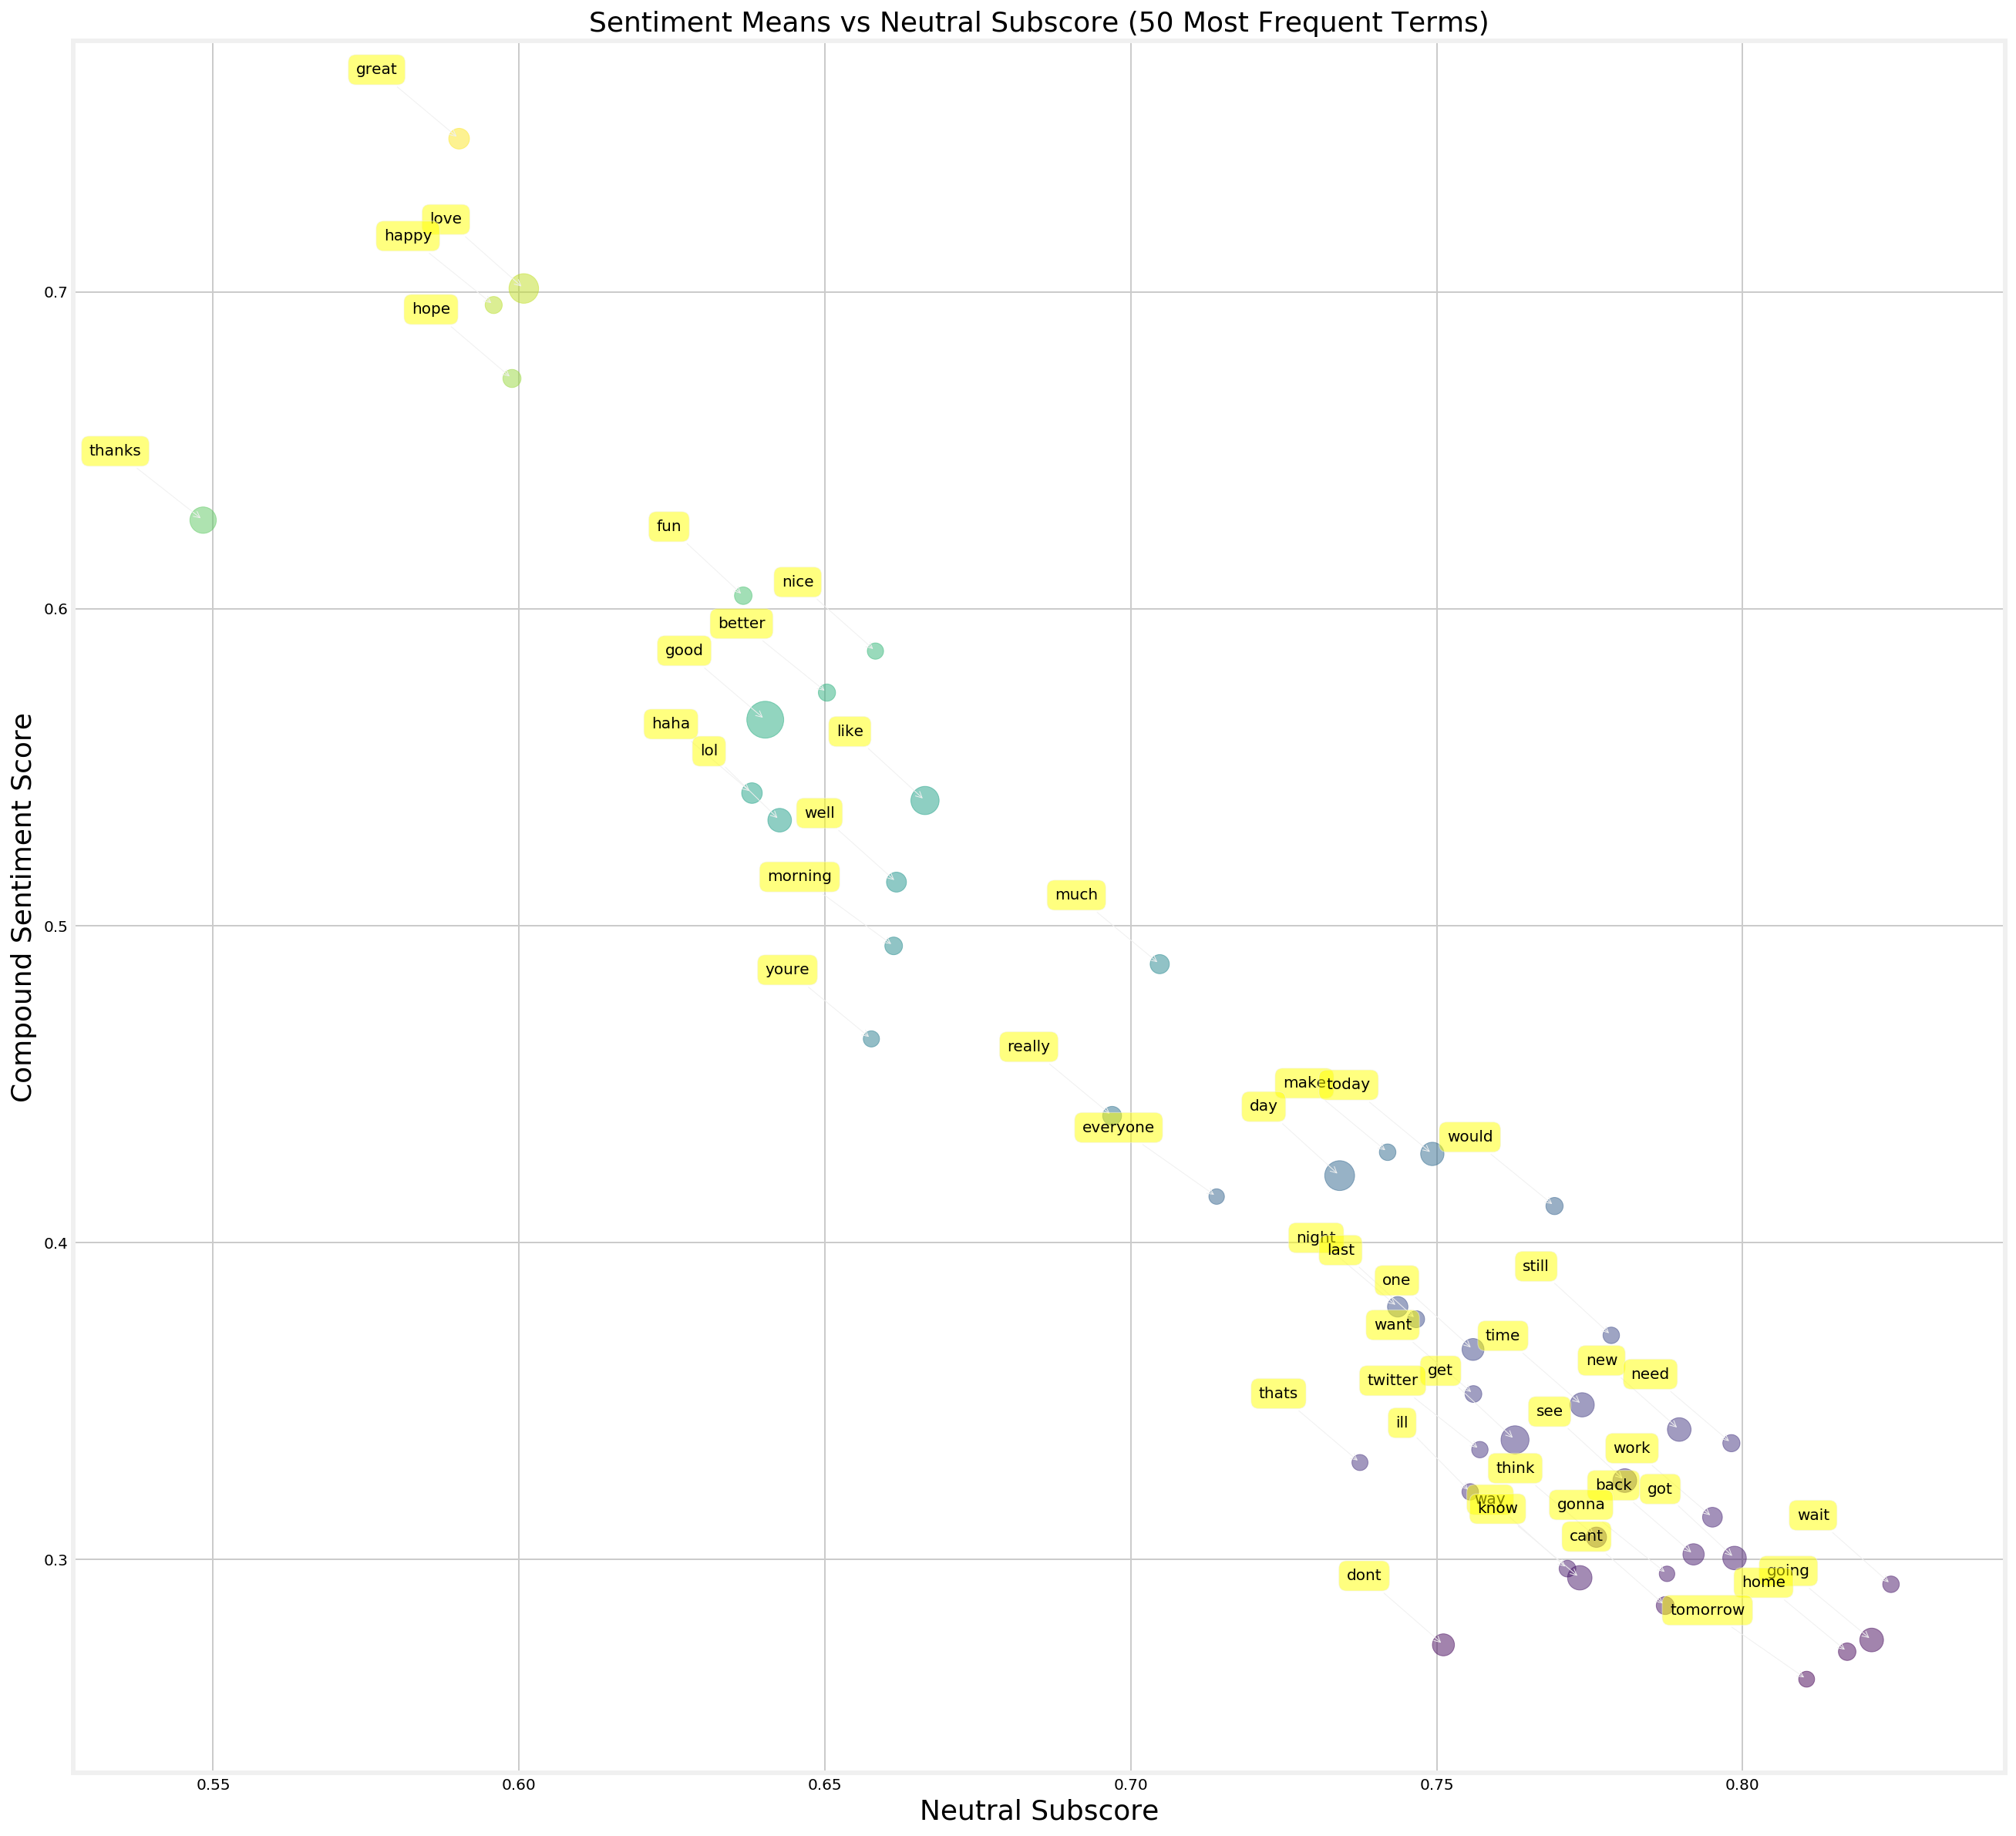

In [140]:
plt.figure(figsize=(20,20))

x = SMF['neu']
y = SMF['compound']
colors = SMF['compound']
area = (SMF['frequency']) 

labels = [i for i in SMF['word']]
plt.subplots_adjust(bottom = 0.1)

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# Add title and axis names
plt.title('Sentiment Means vs Neutral Subscore (50 Most Frequent Terms)',fontsize=18)
plt.xlabel('Neutral Subscore',fontsize=18)
plt.ylabel('Compound Sentiment Score',fontsize=18)

for label, x, y in zip(labels, SMF['neu'], SMF['compound']):
    flip = 2
    if x < .83: flip = -2
        
    flop = 2
    if y < 0: flop = -2
    plt.annotate(
        label,
        xy=(x, y), xytext=(20*flip, 20*flop),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()

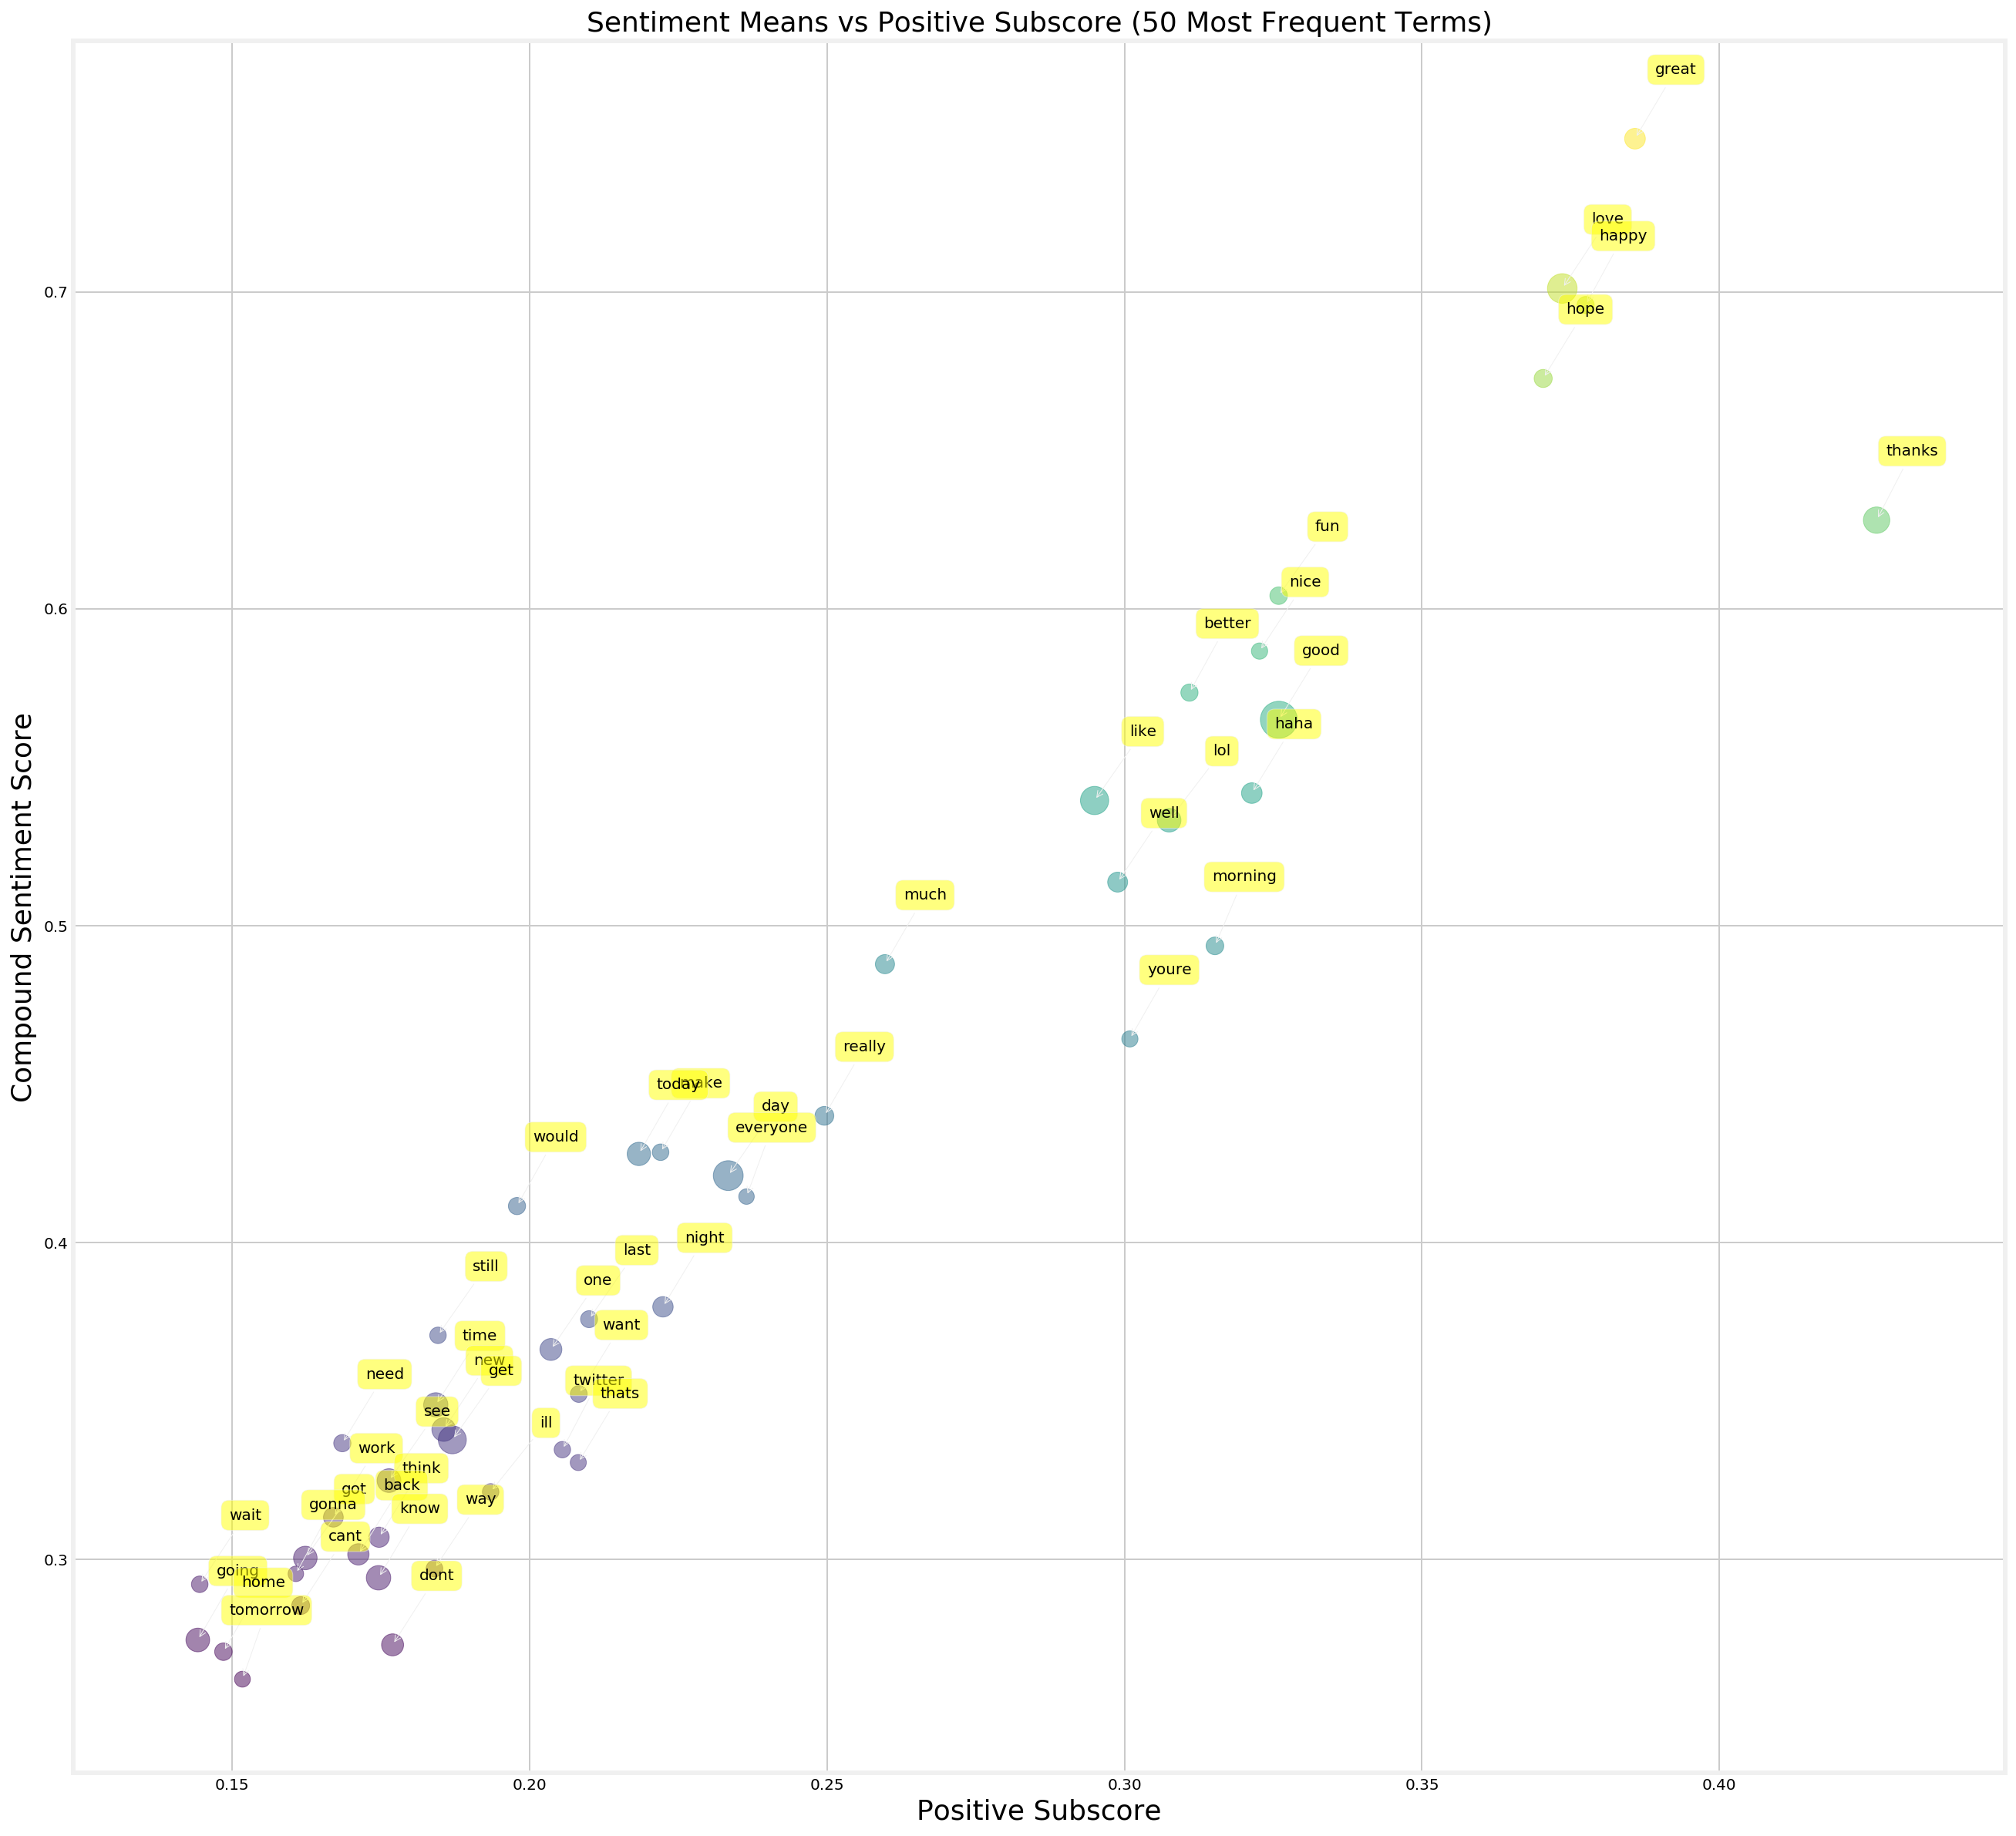

In [141]:
plt.figure(figsize=(20,20))

x = SMF['pos']
y = SMF['compound']
colors = SMF['compound']
area = (SMF['frequency']) 

labels = [i for i in SMF['word']]
plt.subplots_adjust(bottom = 0.1)

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# Add title and axis names
plt.title('Sentiment Means vs Positive Subscore (50 Most Frequent Terms)',fontsize=18)
plt.xlabel('Positive Subscore',fontsize=18)
plt.ylabel('Compound Sentiment Score',fontsize=18)

for label, x, y in zip(labels, SMF['pos'], SMF['compound']):
    flip = 2
    if x < .08: flip = -2
        
    flop = 2
    if y < 0: flop = -2
    plt.annotate(
        label,
        xy=(x, y), xytext=(20*flip, 20*flop),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()


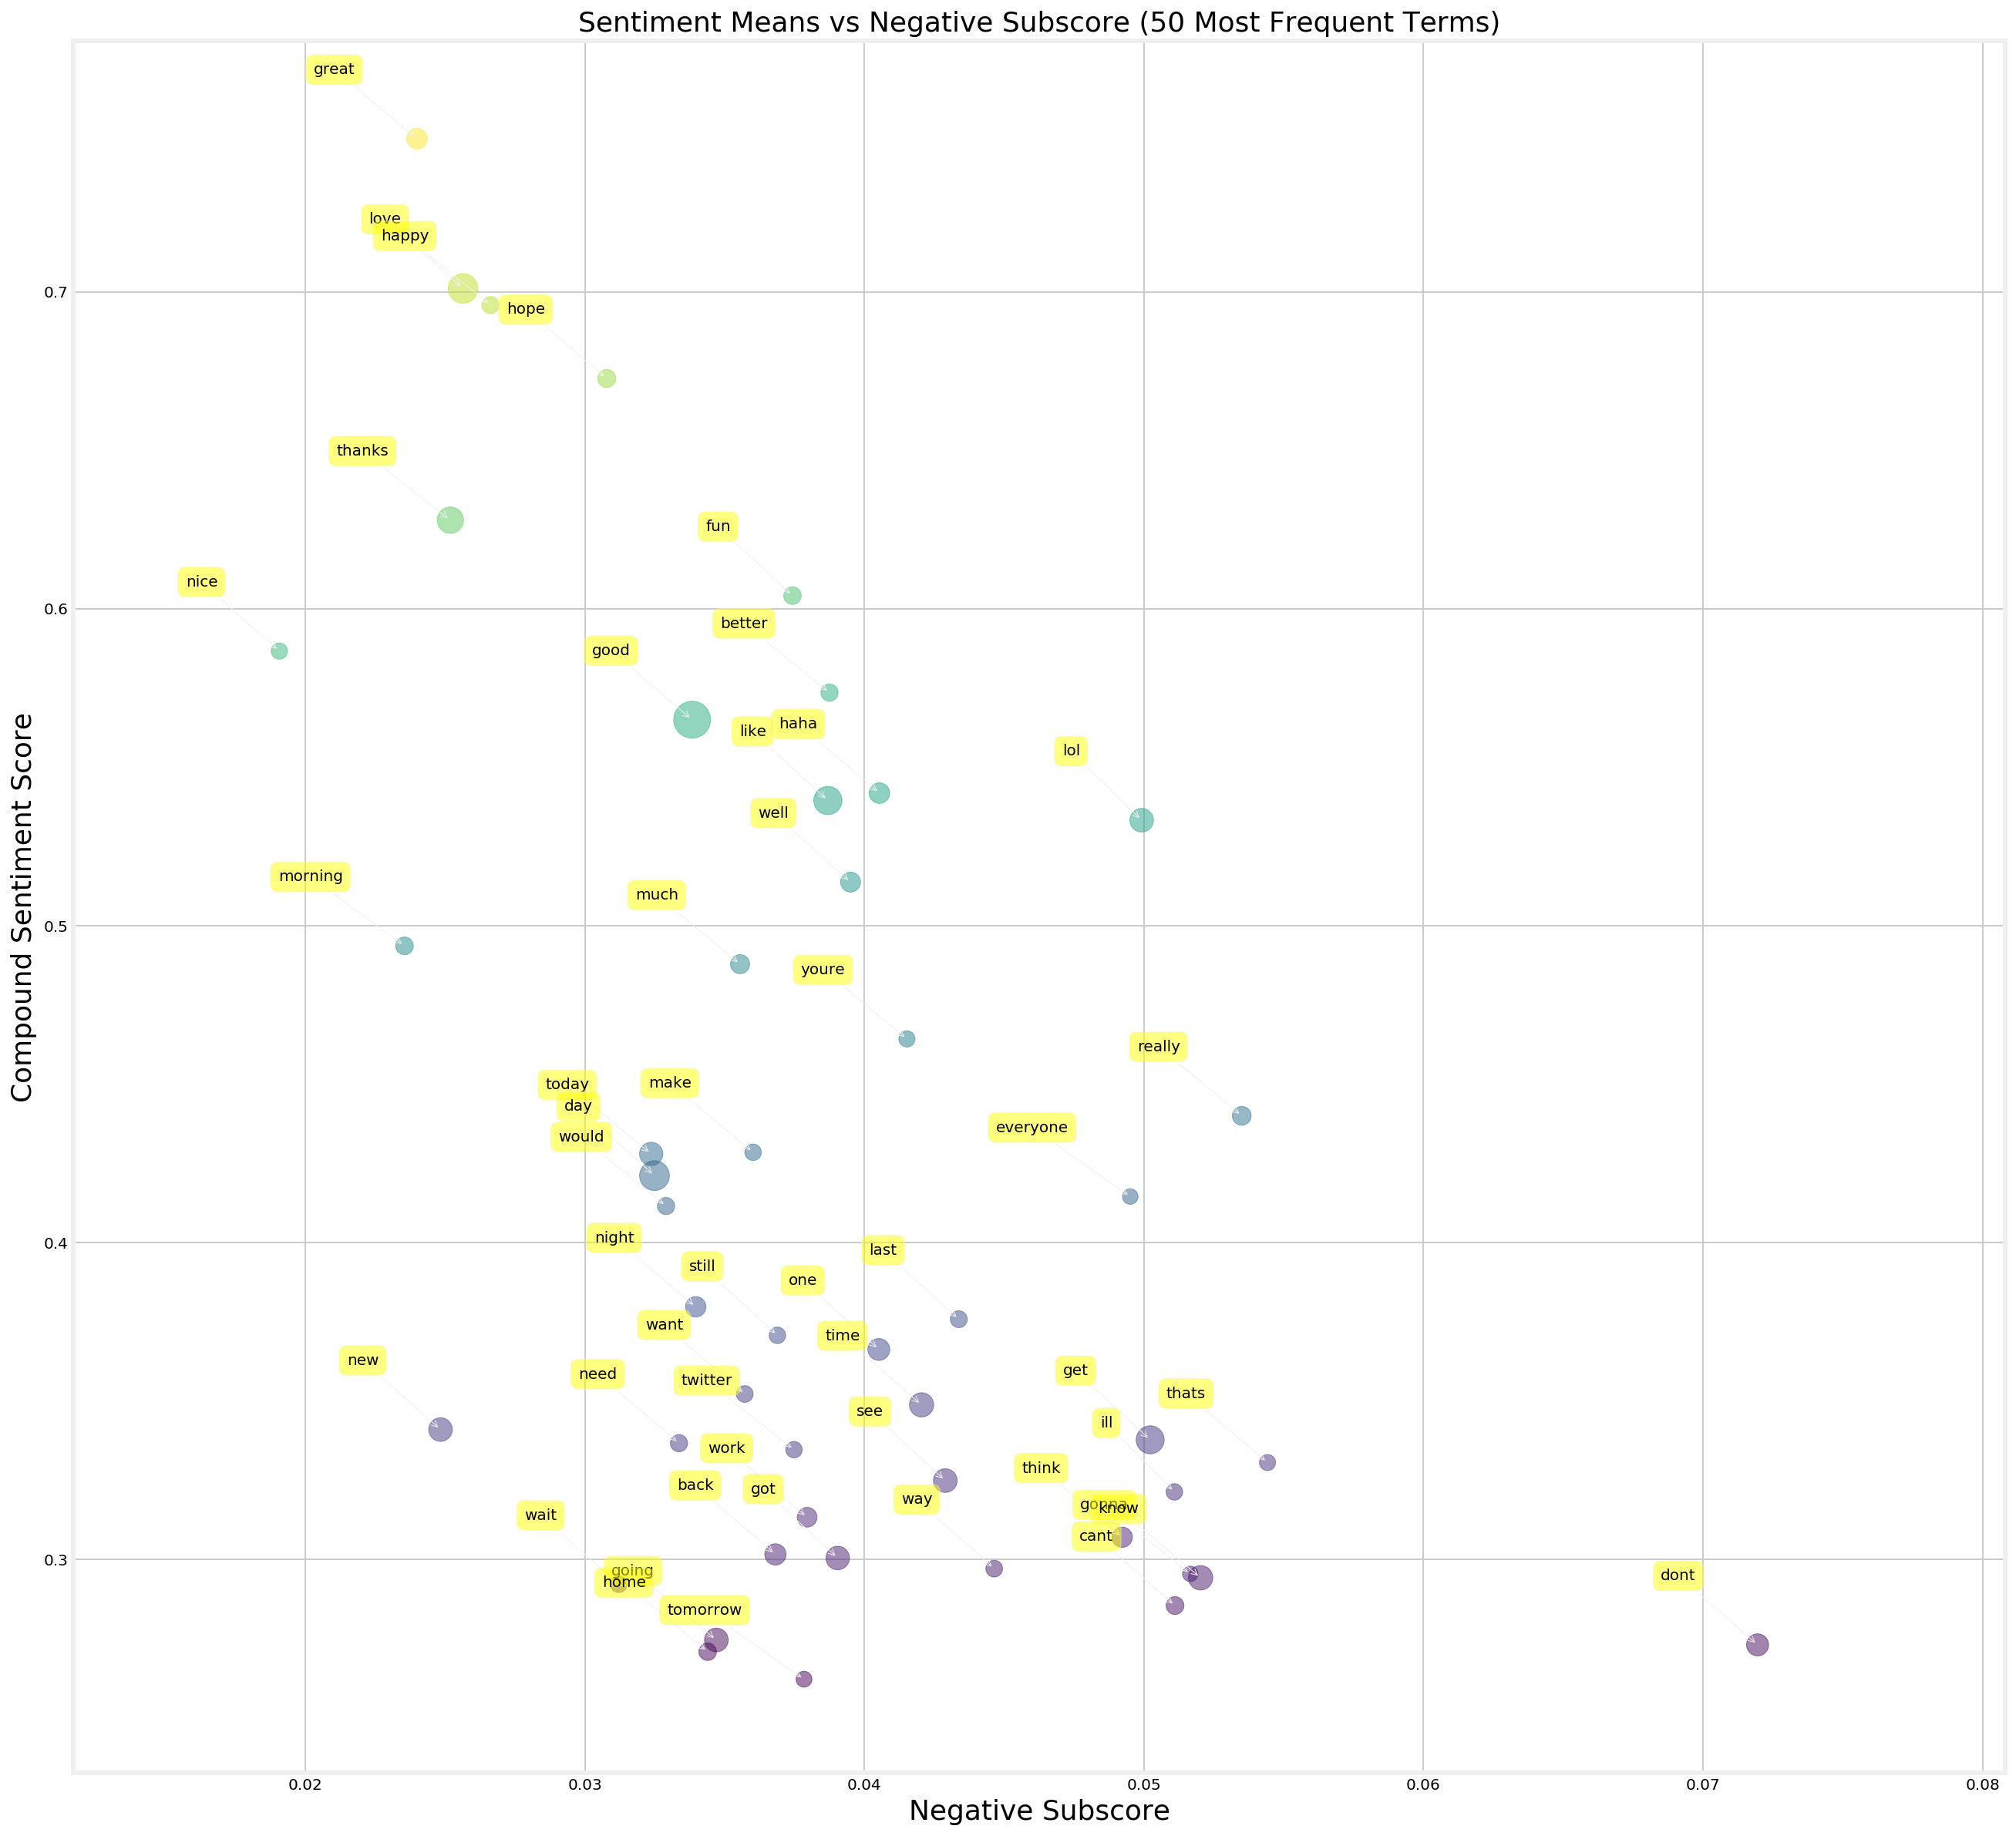

In [142]:
plt.figure(figsize=(20,20))

x = SMF['neg']
y = SMF['compound']
colors = SMF['compound']
area = (SMF['frequency']) 

labels = [i for i in SMF['word']]
plt.subplots_adjust(bottom = 0.1)

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# Add title and axis names
plt.title('Sentiment Means vs Negative Subscore (50 Most Frequent Terms)',fontsize=18)
plt.xlabel('Negative Subscore',fontsize=18)
plt.ylabel('Compound Sentiment Score',fontsize=18)

for label, x, y in zip(labels, SMF['neg'], SMF['compound']):
    flip = 2
    if x < .08: flip = -2
        
    flop = 2
    if y < 0: flop = -2
    plt.annotate(
        label,
        xy=(x, y), xytext=(20*flip, 20*flop),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()


# Splitting the Data in Training and Testing Sets

As you can see, I used almost all the data for training: 98% and the rest for testing.

In [194]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(tweets.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = tweets.iloc[trainIndex]
testData = tweets.iloc[testIndex]

In [195]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
Unnamed: 0    10314 non-null int64
message       10314 non-null object
label         10314 non-null int64
dtypes: int64(2), object(1)
memory usage: 241.8+ KB


In [196]:
trainData['label'].value_counts()

0    7847
1    2269
Name: label, dtype: int64

In [197]:
trainData.head()

Unnamed: 0  \
0         106   
1         217   
2         220   
3         288   
4         540   

                                                                                                                   message  \
0                                                                just had a real good moment. i missssssssss him so much,    
1                                                                               is reading manga  http://plurk.com/p/mzp1e   
2                                     @comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8    
3  @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting...   
4                                                                            ADD ME ON MYSPACE!!!  myspace.com/LookThunder   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [198]:
testData['label'].value_counts()

0    153
1     45
Name: label, dtype: int64

#Pre-processing the data for the training: Tokenization, stemming, and removal of stop words

In [200]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [201]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.tweets, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.tweets.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.tweets.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
                    
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [202]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [203]:
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.9545454545454546
Recall:  0.4666666666666667
F-score:  0.6268656716417911
Accuracy:  0.8737373737373737


In [204]:
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.9333333333333333
Recall:  0.3111111111111111
F-score:  0.4666666666666667
Accuracy:  0.8383838383838383


# Predictions with TF-IDF

# Depressive Tweets

In [205]:
pm = process_message('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(pm)

True

In [206]:
pm = process_message('Extreme sadness, lack of energy, hopelessness')
sc_tf_idf.classify(pm)


True

In [207]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_tf_idf.classify(pm)

True

In [208]:
pm = process_message('I am officially done with @kanyewest')
sc_tf_idf.classify(pm)


True

In [209]:
pm = process_message('Feeling down...')
sc_tf_idf.classify(pm)


True

In [210]:
pm = process_message('My depression will not let me work out')
sc_tf_idf.classify(pm)


True

# Positive Tweets

In [211]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_tf_idf.classify(pm)


False

In [212]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_tf_idf.classify(pm)


False

In [213]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_tf_idf.classify(pm)

False

In [214]:
pm = process_message('It’s the little things that make me smile. Got our new car today and this arrived with it')
sc_tf_idf.classify(pm)

False

# Predictions with Bag-of-Words (BOW)

# Depressive tweets

In [215]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_bow.classify(pm)

True

In [216]:
pm = process_message('My depression will not let me work out')
sc_bow.classify(pm)

True

In [217]:
pm = process_message('Feeling down...')
sc_bow.classify(pm)

False

# Positive Tweets

In [218]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_bow.classify(pm)

False

In [219]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_bow.classify(pm)

False

In [220]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_bow.classify(pm)

False